# Coursework 1
**Replace CID in the file name with your CID**

# Outline


- [Task 1](#task-1): Multi-class classification with Decision Trees and Random Forests <a name="index-task-1"></a>
  - [(1.1)](#task-11) <a name="index-task-11"></a>
  - [(1.2)](#task-12) <a name="index-task-12"></a>
  - [(1.3)](#task-13) <a name="index-task-13"></a>
  - [(1.4)](#task-14) <a name="index-task-14"></a>
- [Task 2](#task-2): Binary classification with the Huberised Support Vector Machine <a name="index-task-2"></a>
  - [(2.1)](#task-21) <a name="index-task-21"></a>
  - [(2.2)](#task-22)  <a name="index-task-22"></a>
- [Task 3](#task-3): Regression with the Multi-Layer Perceptron <a name="index-task-3"></a>
  - [(3.1)](#task-31) <a name="index-task-31"></a>
  - [(3.2)](#task-32)  <a name="index-task-32"></a>



---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm

<a name="task-1"></a>

# Task 1: Multi-class classification with Decision Trees and Random Forests  [(index)](#index-task-1)

<a name="task-11"></a>

## (1.1) [(index)](#index-task-11)

In [2]:
train = pd.read_csv('airfield_statistics_train.csv')
test = pd.read_csv('airfield_statistics_test.csv')
display(train)
display(test)

,Days of airfrost,Precipitation,Sunshine hours,Humidity (%),Wind Speed,Aircraft total movements,Weather and flight condition category,Runway surface minimal temperature,Runway surface maximal temperature
0,24,59.9,58.5,79.3,5.1,1347,3,-2.6,3.8
1,0,66.7,158.3,61.0,3.5,1306,1,11.5,20.0
2,0,39.5,194.6,57.9,3.2,1284,0,8.6,16.8
3,0,34.0,192.8,60.2,2.6,1270,1,12.2,22.4
4,8,17.7,50.3,79.7,2.9,1319,3,2.3,9.5
...,...,...,...,...,...,...,...,...,...
566,0,23.6,266.4,60.7,2.2,1238,1,16.7,28.2
567,14,42.7,105.2,56.5,3.9,1312,0,1.4,8.5
568,0,17.1,166.7,62.4,1.9,1300,2,10.8,20.1
569,3,84.8,81.3,68.3,4.3,1300,2,4.6,11.4


,Days of airfrost,Precipitation,Sunshine hours,Humidity (%),Wind Speed,Aircraft total movements,Weather and flight condition category,Runway surface minimal temperature,Runway surface maximal temperature
0,0,29.8,187.7,59.1,2.5,1303,1,12.5,20.9
1,28,12.9,38.4,71.6,5.1,1261,3,-4.6,0.8
2,2,87.0,200.6,56.6,4.0,1345,0,7.2,15.9
3,7,69.7,66.9,57.5,4.4,1241,0,2.8,8.4
4,0,49.6,119.0,59.6,3.7,1341,0,5.8,13.1
...,...,...,...,...,...,...,...,...,...
240,0,22.5,213.7,58.9,2.3,1285,1,12.3,22.5
241,0,25.9,171.7,56.6,2.8,1413,0,7.6,16.0
242,3,68.7,53.7,73.7,4.3,1275,3,3.8,9.4
243,0,116.8,112.9,71.3,4.2,1273,2,10.2,18.1


In [3]:
X_train = train.drop(train.columns[6:],axis=1)
display(train)
display(test)
X_test = test.drop(test.columns[6:],axis=1)

y_train = train[train.columns[6]]
y_test = test[test.columns[6]]

display(X_train)
display(y_train)

cat_columns_dict = {index: False for index in range(X_train.shape[1])}
print(cat_columns_dict)

,Days of airfrost,Precipitation,Sunshine hours,Humidity (%),Wind Speed,Aircraft total movements,Weather and flight condition category,Runway surface minimal temperature,Runway surface maximal temperature
0,24,59.9,58.5,79.3,5.1,1347,3,-2.6,3.8
1,0,66.7,158.3,61.0,3.5,1306,1,11.5,20.0
2,0,39.5,194.6,57.9,3.2,1284,0,8.6,16.8
3,0,34.0,192.8,60.2,2.6,1270,1,12.2,22.4
4,8,17.7,50.3,79.7,2.9,1319,3,2.3,9.5
...,...,...,...,...,...,...,...,...,...
566,0,23.6,266.4,60.7,2.2,1238,1,16.7,28.2
567,14,42.7,105.2,56.5,3.9,1312,0,1.4,8.5
568,0,17.1,166.7,62.4,1.9,1300,2,10.8,20.1
569,3,84.8,81.3,68.3,4.3,1300,2,4.6,11.4


,Days of airfrost,Precipitation,Sunshine hours,Humidity (%),Wind Speed,Aircraft total movements,Weather and flight condition category,Runway surface minimal temperature,Runway surface maximal temperature
0,0,29.8,187.7,59.1,2.5,1303,1,12.5,20.9
1,28,12.9,38.4,71.6,5.1,1261,3,-4.6,0.8
2,2,87.0,200.6,56.6,4.0,1345,0,7.2,15.9
3,7,69.7,66.9,57.5,4.4,1241,0,2.8,8.4
4,0,49.6,119.0,59.6,3.7,1341,0,5.8,13.1
...,...,...,...,...,...,...,...,...,...
240,0,22.5,213.7,58.9,2.3,1285,1,12.3,22.5
241,0,25.9,171.7,56.6,2.8,1413,0,7.6,16.0
242,3,68.7,53.7,73.7,4.3,1275,3,3.8,9.4
243,0,116.8,112.9,71.3,4.2,1273,2,10.2,18.1


,Days of airfrost,Precipitation,Sunshine hours,Humidity (%),Wind Speed,Aircraft total movements
0,24,59.9,58.5,79.3,5.1,1347
1,0,66.7,158.3,61.0,3.5,1306
2,0,39.5,194.6,57.9,3.2,1284
3,0,34.0,192.8,60.2,2.6,1270
4,8,17.7,50.3,79.7,2.9,1319
...,...,...,...,...,...,...
566,0,23.6,266.4,60.7,2.2,1238
567,14,42.7,105.2,56.5,3.9,1312
568,0,17.1,166.7,62.4,1.9,1300
569,3,84.8,81.3,68.3,4.3,1300


0      3
1      1
2      0
3      1
4      3
      ..
566    1
567    0
568    2
569    2
570    0
Name: Weather and flight condition category, Length: 571, dtype: int64

{0: False, 1: False, 2: False, 3: False, 4: False, 5: False}


In [4]:
display(train)

,Days of airfrost,Precipitation,Sunshine hours,Humidity (%),Wind Speed,Aircraft total movements,Weather and flight condition category,Runway surface minimal temperature,Runway surface maximal temperature
0,24,59.9,58.5,79.3,5.1,1347,3,-2.6,3.8
1,0,66.7,158.3,61.0,3.5,1306,1,11.5,20.0
2,0,39.5,194.6,57.9,3.2,1284,0,8.6,16.8
3,0,34.0,192.8,60.2,2.6,1270,1,12.2,22.4
4,8,17.7,50.3,79.7,2.9,1319,3,2.3,9.5
...,...,...,...,...,...,...,...,...,...
566,0,23.6,266.4,60.7,2.2,1238,1,16.7,28.2
567,14,42.7,105.2,56.5,3.9,1312,0,1.4,8.5
568,0,17.1,166.7,62.4,1.9,1300,2,10.8,20.1
569,3,84.8,81.3,68.3,4.3,1300,2,4.6,11.4


In [5]:
# Function copied from Decision Tree Notebook
def gini_index(y):
    """
    Arguments:
        y: vector of training labels, of shape (N,).
    Returns:
        (float): the GINI-index for the labels in a given region.
    """

    # Count occurrences of each unique label in y
    unique_labels, counts = np.unique(y, return_counts=True)

    # Compute probabilities for each label
    p = counts / len(y)

    # Compute the sum of squared probabilities
    sum_p_squared = np.sum(p**2)

    # Return GINI-Index
    return 1 - sum_p_squared

In [6]:
# Function copied from Decision Tree Notebook
def split_samples(X, y, column, value, categorical):
    """
    Return the split of data whose column-th feature:
      1. equals value, in case `column` is categorical, or
      2. less than value, in case `column` is not categorical (i.e. numerical)

    Arguments:
        X: training features, of shape (N, p).
        y: vector of training labels, of shape (N,).
        column: the column of the feature for splitting.
        value: splitting threshold  the samples
        categorical: boolean value indicating whether column is a categorical variable or numerical.
    Returns:
        tuple(np.array, np.array, np.array): tuple of the left split data (X_l, y_l).
        tuple(np.array, np.array, np.array): tuple of the right split data (X_l, y_l)
    """

    if categorical:
        left_mask =(X[:, column] == value)
    else:
        left_mask = (X[:, column] < value)

    # Using the binary masks `left_mask`, we split X, y, and sample_weights.
    X_l, y_l = X[left_mask, :], y[left_mask]
    X_r, y_r = X[~left_mask, :], y[~left_mask]

    return (X_l, y_l), (X_r, y_r)

In [7]:
# Function copied from Decision Tree Notebook
def gini_split_value(X, y, column, categorical):
    """
    Calculate the GINI-index based on `column` with the split that minimizes the GINI-index.
    Arguments:
        X: training features, of shape (N, p).
        y: vector of training labels, of shape (N,).
        column: the column index of the feature for calculating. 0 <= column < p
        categorical: boolean value indicating whether column is a categorical variable or numerical.
    Returns:
        (float, float): the resulted GINI-index and the corresponding value used in splitting.
    """

    unique_vals = np.unique(X[:, column])

    assert len(unique_vals) > 1, f"There must be more than one distinct feature value. Column: {column}."

    gini_index_val, threshold = np.inf, None

    # iterate over all unique values of the i-th feature
    for value in unique_vals:
        # Split the samples into left and right subsets based on the current value
        (X_l, y_l), (X_r, y_r) = split_samples(X, y, column, value, categorical)

        # check if one of the subsets is empty (invalid split)
        if len(y_l) == 0 or len(y_r) == 0:
            continue

        # calculate the proportion of samples on the left and right sides
        p_left = len(y_l)/(len(y_l)+len(y_r))
        p_right = len(y_r)/(len(y_l)+len(y_r))

        # compute the GINI index for the left and right subsets
        new_cost = p_left * gini_index(y_l) + p_right * gini_index(y_r)

        # update the minimum GINI index and the threshold if this split is better
        if new_cost < gini_index_val:
              gini_index_val, threshold = new_cost, value

    return gini_index_val, threshold

In [8]:
# Function copied from Decision Tree Notebook
def gini_split(X, y, cat_columns_dict):
    """
    Choose the best feature to split according to criterion.
    Args:
        X: training features, of shape (N, p).
        y: vector of training labels, of shape (N,).
        cat_columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
    Returns:
        (float, int, float): the minimal Gini index found, the best feature index and value used in splitting.
        If the feature index is None, then no valid split for the current Node.
    """

    # Initialize `split_column` to None, so if None returned this means there is no valid split at the current node.
    min_gini_index = np.inf
    split_column = None
    split_val = np.nan

    for column, categorical in cat_columns_dict.items():
        # skip column if samples are not separable by that column.
        if len(np.unique(X[:, column])) < 2:
            continue
        gini_index, current_split_val = gini_split_value(X, y, column, categorical)


        if gini_index < min_gini_index:
            # Keep track with:

            # 1. the current minimum gini-index value,
            min_gini_index = gini_index

            # 2. corresponding column,
            split_column = column

            # 3. corresponding split threshold.
            split_val = current_split_val

    return min_gini_index, split_column, split_val

In [9]:
# Function copied from Decision Tree Notebook
def majority_vote(y):
    """
    Return the label which appears the most in y.
    Args:
        y: vector of training labels, of shape (N,).
    Returns:
        (int): the majority label
    """
    
    # Find unique labels and their counts
    labels, counts = np.unique(y, return_counts=True)

    # Identify the label with the maximum count
    majority_label = labels[np.argmax(counts)]

    return majority_label

In [10]:
# Function copied from Decision Tree Notebook
def build_tree(X, y, cat_columns_dict, feature_names, depth, max_depth=10, min_samples_leaf=12):
    """Build the decision tree according to the data.
    Args:
        X: (np.array) training features, of shape (N, p).
        y: (np.array) vector of training labels, of shape (N,).
        cat_columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
        feature_names (list): record the name of features in X in the original dataset.
        depth (int): current depth for this node.
        max_depth (int): maximum depth of the tree.
        min_samples_leaf (int): minimum number of samples in a leaf node.
    Returns:
        (dict): a dict denoting the decision tree (binary-tree). Each parent node has seven attributes:
          1. 'feature_name': The column name of the split.
          2. 'feature_index': The column index of the split.
          3. 'value': The value used for the split.
          4. 'categorical': indicator for categorical/numerical variables.
          5. 'majority_label': For leaf nodes, this stores the dominant label. Otherwise, it is None.
          6. 'left': The left sub-tree with the same structure.
          7. 'right' The right sub-tree with the same structure.
    """
    
    # include a clause for the cases where (i) no feature, (ii) all labels are the same,
    # (iii) depth exceeded, or (iv) X is too small
    if len(np.unique(y))==1 or depth>max_depth or len(X)<=min_samples_leaf:
        return {'majority_label': majority_vote(y)}

    GI, split_index, split_val = gini_split(X, y, cat_columns_dict)

    # If no valid split at this node, use majority vote.
    if split_index is None:
        return {'majority_label': majority_vote(y)}

    categorical = cat_columns_dict[split_index]

    # Split samples (X, y, sample_weights) given column, split-value, and categorical flag.
    (X_l, y_l), (X_r, y_r) = split_samples(X, y, split_index, split_val, categorical)
    return {
        'feature_name': feature_names[split_index],
        'feature_index': split_index,
        'value': split_val,
        'categorical': categorical,
        'majority_label': None,
        'left': build_tree(X_l, y_l, cat_columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf),
        'right': build_tree(X_r, y_r, cat_columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf)
    }

In [11]:
# Function copied from Decision Tree Notebook
def train_f(X, y, cat_columns_dict, max_depth=10):
    """
    Build the decision tree according to the training data.
    Args:
        X: (pd.Dataframe) training features, of shape (N, p). Each X[i] is a training sample.
        y: (pd.Series) vector of training labels, of shape (N,). y[i] is the label for X[i], and each y[i] is
        an integer in the range 0 <= y[i] <= C. Here C = 1.
        cat_columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
        sample_weights: weights for each samples, of shape (N,).
    """

    feature_names = X.columns.tolist()
    X = X.to_numpy()
    y = y.to_numpy()
    return build_tree(X, y, cat_columns_dict, feature_names, depth=1, max_depth=max_depth)

In [12]:
tree = train_f(X_train, y_train, cat_columns_dict)

In [13]:
# Function copied from Decision Tree Notebook
def classify(tree, x):
    """
    Classify a single sample with the fitted decision tree.
    Args:
        tree: (dictionary) the fitted decision tree
        x: ((pd.Dataframe) a single sample features, of shape (p,).
    Returns:
        (int): predicted testing sample label.
    """
    
    if tree['majority_label'] is not None:
        return tree['majority_label']

    elif tree['categorical']:
        if x[tree['feature_index']] == tree['value']:
            # go to left branch
            return classify(tree['left'], x)
        else:
            # go to right branch
            return classify(tree['right'], x)

    else:

        if x[tree['feature_index']] < tree['value']:
            # go to left branch
            return classify(tree['left'], x)
        else:
            # go to right branch
            return classify(tree['right'], x)

In [14]:
# Function copied from Decision Tree Notebook
def predict(tree, X):
    """
    Predict classification results for X.
    Args:
        X: (pd.Dataframe) testing sample features, of shape (N, p).
    Returns:
        (np.array): predicted testing sample labels, of shape (N,).
    """
    
    if len(X.shape) == 1:
        return classify(tree, X)
    else:
        return np.array([classify(tree, x) for x in X])

In [15]:
# Function copied from Decision Tree Notebook
def tree_score(tree, X_test, y_test):
    
    y_pred = predict(tree, X_test)
    return np.mean(y_pred==y_test)

In [16]:
print('Training accuracy:', tree_score(tree, X_train.to_numpy(), y_train.to_numpy()))
print('Test accuracy:', tree_score(tree, X_test.to_numpy(), y_test.to_numpy()))

Training accuracy: 0.9281961471103327
Test accuracy: 0.8530612244897959


In [17]:
# Function copied from KNN Notebook
def standardise(X, X_train_=None):
    """Standardise features.

    Parameters:
        X (np.array): Feature matrix.
        X_train_ (np.array): An optional feature matrix to compute the statistics
            from before applying it to X. If None, just use X to compute the statistics.

    Returns:
        X_std (np.array): Standardised feature matrix
    """
    if X_train_ is None:
        X_train_ = X
    
    # Here we have removed 'keepdims = True' when calculating the mean and standard deviation
    # This is because here we feed in a pandas dataframe, so np.mean and np.std returns a series as required
    # In the KNN notebook where this function is taken from we applied it to numpy arrays
    mu = np.mean(X_train_, axis=0)
    sigma = np.std(X_train_, axis=0)
    X_std = (X - mu) / sigma
    return X_std

In [18]:
X_train_std = standardise(X_train)
X_test_std = standardise(X_test, X_train)
tree2 = train_f(X_train_std, y_train, cat_columns_dict)
print('Training accuracy:', tree_score(tree2, X_train_std.to_numpy(), y_train.to_numpy()))
print('Test accuracy:', tree_score(tree2, X_test_std.to_numpy(), y_test.to_numpy()))

Training accuracy: 0.9281961471103327
Test accuracy: 0.8530612244897959


The training and testing accuracies remain the same with or without standardisation of data. This is to be expected since the splits in decision trees are determined by the order of values of features rather than the actual magnitude of these values. Standardising the data does not affect the order of the values and as such the accuracies remain unchanged.

We see that there is a decrease in accuracy on the testing set when compared to the training set. This suggests overfitting, which decision trees are very prone to. We could perhaps improve our generalisation power by reducing max_depth, since too much depth could lead to overfitting.

In [19]:
# Function copied from KNN Notebook
def euclidean_distance(x_i, x_j):

    '''
    Argument:
    x_i: vector with shape (p,)
    x_j: vector with shape (p,) or matrix with shape (n, p)

    Returns:
    d: distance between x_i and x_j (if both vectors), or between x_i and each row of x_j (if x_j is matrix)
    '''

    assert x_i.shape == x_j.shape or x_j.shape[1] == x_i.shape[0]

    return np.sqrt(np.sum((x_i-x_j)**2, axis=1))

In [20]:
# Function copied from KNN Notebook
def k_neighbours(X_train, X_test, k=25, return_distance=False):
    """
    This function finds the k nearest neighbours in X_train for each point in X_test .

    Argument:
    X_train: training data
    X_test: test data
    k: number of nearest neighbours
    return_distance: if True, return distances too

    Returns:
    np.array(neigh_ind): array of indices of k nearest neighbours

    """

    n_neighbours = k
    dist = []
    neigh_ind = []

    # compute distance from each point x_test in X_test to all points in X_train (hint: use python's list comprehension)
    point_dist = [euclidean_distance(x_test, X_train) for x_test in X_test]

    # determine which k training points are closest to each test point
    for row in point_dist:
        enum_neigh = enumerate(row)
        sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:k]

        ind_list = [tup[0] for tup in sorted_neigh]
        dist_list = [tup[1] for tup in sorted_neigh]

        dist.append(dist_list)
        neigh_ind.append(ind_list)

    # return distances together with indices of k nearest neighbours
    if return_distance:
        return np.array(dist), np.array(neigh_ind)

    return np.array(neigh_ind)

In [21]:
# Function copied from KNN Notebook
def predict_knn(X_train, y_train, X_test, k=5):
    """
    This function predicts labels of test data given training data and labels.

    Argument:
    X_train: training data
    y_train: training labels
    X_test: test data
    k: number of nearest neighbours

    Returns:
    y_pred: predicted labels for X_test

    """
    
    # each of the k neighbours contributes equally to the classification of any data point in X_test
    neighbours = k_neighbours(X_train, X_test, k=k)
    # count number of occurences of label with np.bincount and choose the label that has most with np.argmax (hint: use python's list comprehension)
    y_pred = np.array([np.argmax(np.bincount(y_train[neighbour])) for neighbour in neighbours])

    return y_pred

In [22]:
# Function copied from KNN Notebook
def score_knn(X_train, y_train, X_test, y_test, k=5):

    y_pred = predict_knn(X_train, y_train, X_test, k=k)

    return float(sum(y_pred==y_test))/ float(len(y_test))

In [23]:
print('Training set mean accuracy:', score_knn(X_train.to_numpy(), y_train.to_numpy(), X_train.to_numpy(), y_train.to_numpy(), k=25))
print('Test set mean accuracy:', score_knn(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy(), k=25))

Training set mean accuracy: 0.6112084063047285
Test set mean accuracy: 0.6040816326530613


In [24]:
print('Training set mean accuracy:', score_knn(X_train_std.to_numpy(), y_train.to_numpy(), X_train_std.to_numpy(), y_train.to_numpy(), k=25))
print('Test set mean accuracy:', score_knn(X_train_std.to_numpy(), y_train.to_numpy(), X_test_std.to_numpy(), y_test.to_numpy(), k=25))

Training set mean accuracy: 0.7968476357267951
Test set mean accuracy: 0.8081632653061225


Unlike in the decision tree example, both the training and testing accuracies improve when the data is standardised. Since the KNN algorithm uses a distance metric (in our case, the Euclidean distance) to find the closest k points to an input point, the scale of the features will affect the classifier.

If we do not standardise our data, features with larger scales will dominate the distance metric, so the classifier will give less importance to other features. However a feature having a smaller scale does not mean that it is less important in the classification; as such standardising the data allows us to take all features into account equally.

For example we see that the 'Wind Speed' feature is on a much smaller scale compared to the other features like 'Aircraft Total Movements'. Since we do not have a hypothesis giving more importance to certain features, we would expect standardisation to improve the accuracy of the KNN model.

Even with standardisation, the decision tree classifier outperforms the KNN classifier. This may be due to the fact that decision trees are able to capture non-linearity well, which the KNN classifier may struggle with.

Since the testing accuracy is similar to the training accuracy we note that the KNN model is not overfitting.

<a name="task-12"></a>

## (1.2) [(index)](#index-task-12)

In [25]:
def compute_class_probabilities(y, num_classes):
    """
    Arguments:
        y: vector of training labels, of shape (N,).
        num_classes: integer number of possible classes
    Returns:
        probabilities: the node impurity probability vector, of shape (num_classes,), where each entry is the probability of lying in a given class
    """
    
    # This function is analagous to gini_index but instead stops at the probability vector
    # In gini_index if a class does not appear in the data then it receives 0 weight
    # As such if the probability vector has a different length we can still calculate the gini index
    # However here we have to ensure that the output probability vector is of the same length as the number of classes
    # Therefore we have to take the number of classes as an argument
    
    
    # Count occurrences of each unique label in y
    unique_labels, counts = np.unique(y, return_counts=True)
    
    # Compute probabilities for each label
    p = np.zeros(num_classes)
    p[unique_labels] = counts / len(y)
    
    return p

In [26]:
def build_tree_soft(X, y, cat_columns_dict, feature_names, depth, num_classes, max_depth=10, min_samples_leaf=12):
    """Build the decision tree according to the data.
    Args:
        X: (np.array) training features, of shape (N, p).
        y: (np.array) vector of training labels, of shape (N,).
        cat_columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
        feature_names (list): record the name of features in X in the original dataset.
        depth (int): current depth for this node.
        num_classes: integer number of possible classes
        max_depth (int): maximum depth of the tree.
        min_samples_leaf (int): minimum number of samples in a leaf node.
    Returns:
        (dict): a dict denoting the decision tree (binary-tree). Each parent node has seven attributes:
          1. 'feature_name': The column name of the split.
          2. 'feature_index': The column index of the split.
          3. 'value': The value used for the split.
          4. 'categorical': indicator for categorical/numerical variables.
          5. 'class_probabilities': For leaf nodes, this stores the node impurity probability vector. Otherwise, it is None.
          6. 'left': The left sub-tree with the same structure.
          7. 'right' The right sub-tree with the same structure.
    """
    
    # This function is analagous to build_tree but instead stores all the probability vectors and not just the most common class
    # Again num_classes is an additional argument to be used when calling compute_class_probabilities
    
    
    # include a clause for the cases where (i) no feature, (ii) all labels are the same,
    # (iii) depth exceeded, or (iv) X is too small
    if len(np.unique(y)) == 1 or depth > max_depth or len(X) <= min_samples_leaf:
        return {'class_probabilities': compute_class_probabilities(y, num_classes)}
    
    GI, split_index, split_val = gini_split(X, y, cat_columns_dict)
    
    # If no valid split at this node, use the current node impurity probability vector.
    if split_index is None:
        return {'class_probabilities': compute_class_probabilities(y, num_classes)}
    
    categorical = cat_columns_dict[split_index]
    
    # Split samples (X, y, sample_weights) given column, split-value, and categorical flag.
    (X_l, y_l), (X_r, y_r) = split_samples(X, y, split_index, split_val, categorical)
    # Here we have class_probabilities as an attribute of each node in the tree (instead of the majority vote)
    return {
        'feature_name': feature_names[split_index],
        'feature_index': split_index,
        'value': split_val,
        'categorical': categorical,
        'class_probabilities': None,
        'left': build_tree_soft(X_l, y_l, cat_columns_dict, feature_names, depth + 1, num_classes, max_depth, min_samples_leaf),
        'right': build_tree_soft(X_r, y_r, cat_columns_dict, feature_names, depth + 1, num_classes, max_depth, min_samples_leaf)
    }

In [27]:
def train_soft(X, y, cat_columns_dict, num_classes, max_depth=10):
    """
    Build the decision tree according to the training data.
    Args:
        X: (pd.Dataframe) training features, of shape (N, p). Each X[i] is a training sample.
        y: (pd.Series) vector of training labels, of shape (N,). y[i] is the label for X[i], and each y[i] is
        an integer in the range 0 <= y[i] <= C. Here C = 1.
        cat_columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
        sample_weights: weights for each samples, of shape (N,)
        num_classes: integer number of possible classes
    """
    
    # This function is almost identical to train. Again we pass num_classes as a parameter
    # This is to account for the extremely unlikely event that our entire training dataset does not contain a given class in any datapoint
    # This makes our code slightly more reusable, for example if we want to reuse our code for a different dataset which misses a class
    # This could occur if we have a smaller dataset or if we have some external factor at play (e.g. our training data was from a calm/rainy season)
    
    feature_names = X.columns.tolist()
    X = X.to_numpy()
    y = y.to_numpy()
    return build_tree_soft(X, y, cat_columns_dict, feature_names, depth=1, num_classes=num_classes, max_depth=max_depth)

In [28]:
def classify_soft(tree, x):
    """
    Classify a single sample with the fitted decision tree.
    Args:
        tree: (dictionary) the fitted decision tree
        x: ((pd.Dataframe) a single sample features, of shape (p,).
    Returns:
        (int): predicted testing sample label.
    """
    
    # This function is almost identical to classify
    # We no longer store the majority vote as an attribute of the nodes of the tree
    # Instead we store the probability vector (node impurity)
    # So we check class_probabilities instead of majority_label
    
    if tree['class_probabilities'] is not None:
        return tree['class_probabilities']
    
    if tree['categorical']:
        if x[tree['feature_index']] == tree['value']:
            return classify_soft(tree['left'], x)
        else:
            return classify_soft(tree['right'], x)
    else:
        if x[tree['feature_index']] < tree['value']:
            return classify_soft(tree['left'], x)
        else:
            return classify_soft(tree['right'], x)

In [29]:
def predict_probabilities(tree, X):
    """
    Predict soft classification results for X.
    Args:
        X: (pd.Dataframe) testing sample features, of shape (N, p).
    Returns:
        (np.array): predicted testing probabilties of shape (N, num_classes).
    """
    
    # Identical to the predict function but uses the classify_soft function instead of classify
    
    return np.array([classify_soft(tree, x) for x in X])

In [30]:
def predict_soft_to_hard(tree, X):
    """
    Predict hard classification results for X from the soft classification results.
    Args:
        X: (pd.Dataframe) testing sample features, of shape (N, p).
    Returns:
        (np.array): predicted testing labels of shape (N,).
    """
    
    # Here we go back to a hard classification problem if we so desire.
    
    p = predict_probabilities(tree, X)
    return np.argmax(p, axis=1)

In [31]:
def tree_score_soft_to_hard(tree, X_test, y_test):
    
    # Identical to tree_score but uses the new predict_soft_to_hard function instead of predict.
    
    y_pred = predict_soft_to_hard(tree, X_test)
    return np.mean(y_pred == y_test)

In [32]:
# Train the tree
tree3 = train_soft(X_train, y_train, cat_columns_dict, 4)

print('Training accuracy:', tree_score_soft_to_hard(tree3, X_train.to_numpy(), y_train.to_numpy()))
print('Test accuracy:', tree_score_soft_to_hard(tree3, X_test.to_numpy(), y_test.to_numpy()))

Training accuracy: 0.9281961471103327
Test accuracy: 0.8530612244897959


In [33]:
test_probabilities = predict_probabilities(tree3, X_test.to_numpy())

In [34]:
def roc_curve(y_true, y_log):
    """
    This function finds the ROC curve values and computes the AUC.

    Arguments:
    y_true: Ground truth labels with size N
    y_log: Probabilities produced by model with size N

    Returns:
    auc: Area Under the Curve (AUC)
    tpr_l: List of true positive rate (TPR) values for each scanned threshold
    fpr_l: List of false positive rate (FPR) values for each scanned threshold
    thresholds: Scanned thresholds sorted in decreasing order

    """
    # Function is almost identical to roc_curve from Logistic Regression Notebook
    
    # List of distinct values in y_log, sorted sorted in decreasing order
    thresholds = reversed(sorted(set(y_log)))
    
    # Manually add (0,0) on the graph for visual reasons
    tpr_l, fpr_l = [0], [0]

    for threshold in thresholds:
        # Thresholding
        y_thresholded = (y_log >= threshold)

        # True positives
        tp = np.sum(y_true & y_thresholded)
        # True negatives
        tn = np.sum((~y_true) & (~y_thresholded))
        # False positives
        fp = np.sum((~y_true) & y_thresholded)
        # False negatives
        fn = np.sum(y_true & (~y_thresholded))

        tpr = tp / (tp + fn)
        fpr = fp / (tn + fp)
        tpr_l.append(tpr)
        fpr_l.append(fpr)

    # Compute AUC using Trapezoidal rule
    auc = np.trapz(tpr_l, fpr_l)
    return auc, tpr_l, fpr_l, thresholds

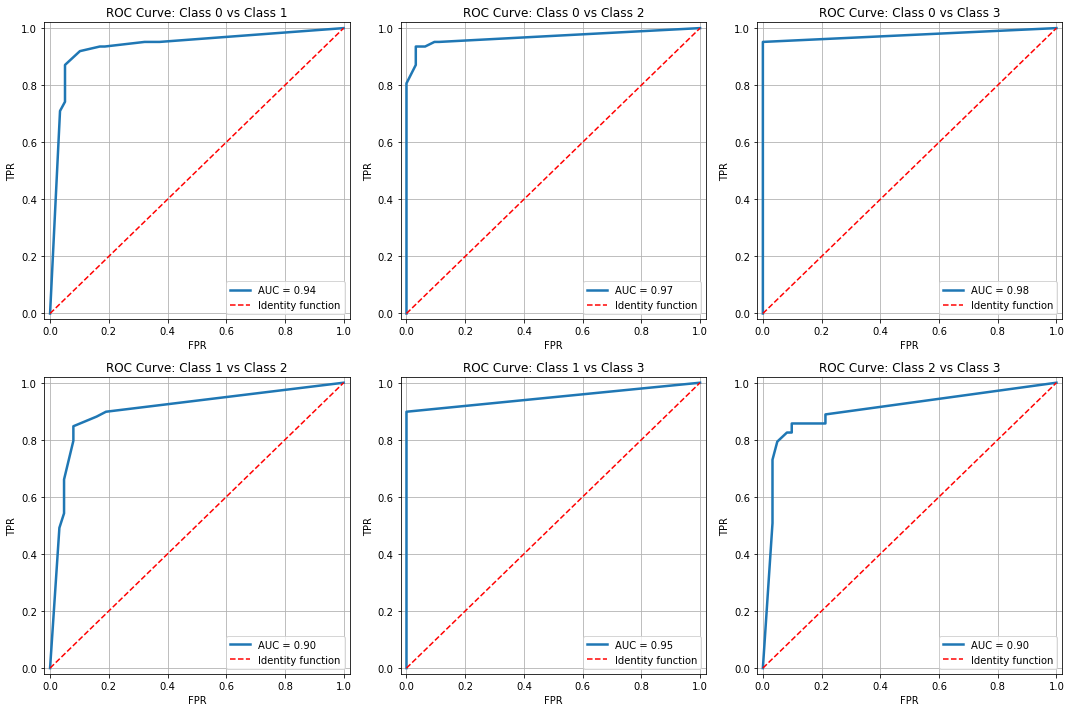

In [35]:
def plot_pairwise_roc(y_test, test_probabilities):
    
    """
    This function plots the ROC curves for each pair of classes.

    Arguments:
    y_true: Ground truth labels with size N
    test_probabilities: Test probabilities produced by decision tree model with size (N,num_classes)

    Returns:
    None, just prints the 6 plots

    """
    
    # Function based off of plotting code in Logistic Regression notebook, adapted to choose all pairs of classes
    
    # Find all pairs of classes
    classes = np.unique(y_test)
    class_pairs = [(classes[i], classes[j]) for i in range(len(classes)) for j in range(i + 1, len(classes))]
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    # Make iterating easier by converting to a 1D array
    axes = axes.flatten()
    
    # Iterate through all pairs of classes and plot the ROC curves for each
    for i, (class_A, class_B) in enumerate(class_pairs):
        
        # Create a boolean mask to find indices where we have class A or class B
        mask = (y_test == class_A) | (y_test == class_B)
        
        # Find the test values at these indices
        y_test_A_or_B = y_test[mask] == class_A
        
        # Convert to a binary classification problem so we can reuse code from the logistic regression notebook
        y_binary = y_test_A_or_B.astype(int)
        
        # Get the probabilities for class A in the testing data
        y_scores = test_probabilities[mask, class_A]
        
        auc_value, tpr, fpr, _ = roc_curve(y_binary, y_scores)
        
        axes[i].plot(fpr, tpr, label=f'AUC = {auc_value:.2f}', lw=2.5)
        axes[i].plot([0, 1], [0, 1], 'r--', label='Identity function')
        axes[i].set_title(f'ROC Curve: Class {class_A} vs Class {class_B}')
        
        # Adjust axes limits since the curve will be close to the y-axis
        axes[i].set_xlim([-0.02, 1.02])
        axes[i].set_ylim([-0.02, 1.02])
        axes[i].set_ylabel('TPR')
        axes[i].set_xlabel('FPR')
        axes[i].legend(loc='lower right')
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()

plot_pairwise_roc(y_test, test_probabilities)

We observe from the ROC curves that the decision tree is able to distinguish between all pairs of classes effectively - we have an AUC value above 0.87 for all pairs. As such our dataset is likely to have particularly distinctive features.

We note that the decision tree distiguishes between class 0 and other classes especially well (these have high AUC values of 0.94, 0.97 and 0.98). This may be due to the quality of our data - having a weather condition of 0, indicating close to optimal flight conditions, is very easy to distinguish from sub-optimal conditions (rain, wind, etc. are all observable, whereas these will not be present when we have class 0). In contrast there may be a level of subjectivity when it comes to classifying poorer weather/flight conditions, e.g. one person may classify the conditons as 2 but another may classify it as 3. This could mean that our dataset has cleaner data for class 0 than the other classes, which would explain this behaviour.

<a name="task-13"></a>

## (1.3) [(index)](#index-task-13)

In [36]:
rng = np.random.default_rng(0)

In [37]:
# Function copied from Random Forest Notebook
def gini_split_rf(n_features, X, y, cat_columns_dict):
    """
    Choose the best feature to split according to criterion.
    Args:
        n_features: number of sampled features.
        X: training features, of shape (N, p).
        y: vector of training labels, of shape (N,).
        cat_columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
    Returns:
        (float, int, float): the minimized gini-index, the best feature index and value used in splitting.
    """

    # The added sampling step.
    columns = rng.choice(list(cat_columns_dict.keys()), n_features, replace=False)
    cat_columns_dict = {c: cat_columns_dict[c] for c in columns}

    min_gini_index, split_column, split_val = np.inf, 0, 0

    # Only scan through the sampled columns in `cat_columns_dict`.
    for column, categorical in cat_columns_dict.items():
        # skip column if samples are not separable by that column.
        if len(np.unique(X[:, column])) < 2:
            continue

        # search for the best splitting value for the given column.
        gini_index, val = gini_split_value(X, y, column, categorical)  ## <-- SOLUTION
        if gini_index < min_gini_index:
            min_gini_index, split_column, split_val = gini_index, column, val

    return min_gini_index, split_column, split_val

In [38]:
# Function copied from Random Forest Notebook
def build_tree_rf(n_features, X, y, cat_columns_dict, feature_names, depth,  max_depth=10, min_samples_leaf=12):
    """Build the decision tree according to the data.
    Args:
        X: (np.array) training features, of shape (N, p).
        y: (np.array) vector of training labels, of shape (N,).
        cat_columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
        feature_names (list): record the name of features in X in the original dataset.
        depth (int): current depth for this node.
        max_depth (int): maximum depth of the tree.
        min_samples_leaf (int): minimum number of samples in a leaf node.
    Returns:
        (dict): a dict denoting the decision tree (binary-tree). Each node has seven attributes:
          1. 'feature_name': The column name of the split.
          2. 'feature_index': The column index of the split.
          3. 'value': The value used for the split.
          4. 'categorical': indicator for categorical/numerical variables.
          5. 'majority_label': For leaf nodes, this stores the dominant label. Otherwise, it is None.
          6. 'left': The left sub-tree with the same structure.
          7. 'right' The right sub-tree with the same structure.
    """
    # include a clause for the cases where (i) all lables are the same, (ii) depth exceeded (iii) X is too small
    if len(np.unique(y)) == 1 or depth>max_depth or len(X)<=min_samples_leaf:
        return {'majority_label': majority_vote(y)}

    else:
        GI, split_column, split_val = gini_split_rf(n_features, X, y, cat_columns_dict)  ## <-- SOLUTION

        # If GI is infinity, it means that samples are not separable by the sampled features.
        if GI == np.inf:
            return {'majority_label': majority_vote(y)}
        categorical = cat_columns_dict[split_column]
        (X_l, y_l), (X_r, y_r) = split_samples(X, y, split_column, split_val, categorical) ## <-- SOLUTION
        return {
            'feature_name': feature_names[split_column],
            'feature_index': split_column,
            'value': split_val,
            'categorical': categorical,
            'majority_label': None,
            'left': build_tree_rf(n_features, X_l, y_l, cat_columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf),
            'right': build_tree_rf(n_features, X_r, y_r, cat_columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf)
        }

In [39]:
# Function copied from Random Forest Notebook
def train_rf(B, n_features, X, y,  cat_columns_dict, max_depth=10):
    """
    Resample B datasets from the training data and build a decision tree for each of them.
    Args:
        B: number of decision trees.
        X: (pd.Dataframe) training features, of shape (N, p). Each X[i] is a training sample.
        y: (pd.Series) vector of training labels, of shape (N,). y[i] is the label for X[i], and each y[i] is
        an integer in the range 0 <= y[i] <= C. Here C = 1.
        cat_columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
    """

    feature_names = X.columns.tolist()
    X = X.to_numpy()
    y = y.to_numpy()
    N = X.shape[0]
    training_indices = np.arange(N)
    trees = []

    for _ in range(B):
        # Sample the training_indices (with replacement)
        sample = rng.choice(training_indices, N, replace=True) # <- SOLUTION
        X_sample = X[sample, :]
        y_sample = y[sample]
        tree = build_tree_rf(n_features, X_sample, y_sample,
                        cat_columns_dict, feature_names, depth=1, max_depth=max_depth)
        trees.append(tree)

    return trees

In [40]:
# Function copied from Random Forest Notebook
def aggregate(decisions):
    """
    This function takes a list of predicted labels produced by a list
    of decision trees and returns the label with the majority of votes.
    """
    count = defaultdict(int)
    for decision in decisions:
        count[decision] += 1
    return max(count, key=count.get) # <- SOLUTION

# Function copied from Random Forest Notebook
def predict_rf(rf, X):
    """
    Predict classification results for X.
    Args:
        rf: A trained random forest through train_rf function.
        X: (pd.Dataframe) testing sample features, of shape (N, p).
    Returns:
        (np.array): predicted testing sample labels, of shape (N,).
    """

    if len(X.shape) == 1:
        # if we have one sample
        return aggregate([classify(tree, X) for tree in rf])
    else:
        # if we have multiple samples
        return np.array([aggregate([classify(tree, x) for tree in rf]) for x in X])

In [41]:
# Function copied from Random Forest Notebook
def rf_score(rf, X_test, y_test):
    y_pred = predict_rf(rf, X_test) ## <-- SOLUTION
    return np.mean(y_pred==y_test)

In [42]:
# Here we set n_features = (number of columns)/3 = 6/3 = 2
n_features = 2
B = 20
# Fit the random forest with training data
rf = train_rf(B, n_features, X_train, y_train, cat_columns_dict)

In [43]:
print('Training set accuracy: ',rf_score(rf, X_train.to_numpy(), y_train.to_numpy()))
print('Test set accuracy: ',rf_score(rf, X_test.to_numpy(), y_test.to_numpy()))

Training set accuracy:  0.9492119089316988
Test set accuracy:  0.8734693877551021


In [44]:
def build_tree_rf_with_gini(n_features, X, y, cat_columns_dict, feature_names, depth, max_depth=10, min_samples_leaf=12):
    """Build the decision tree according to the data.
    Args:
        X: (np.array) training features, of shape (N, p).
        y: (np.array) vector of training labels, of shape (N,).
        cat_columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
        feature_names (list): record the name of features in X in the original dataset.
        depth (int): current depth for this node.
        max_depth (int): maximum depth of the tree.
        min_samples_leaf (int): minimum number of samples in a leaf node.
    Returns:
        (dict): a dict denoting the decision tree (binary-tree). Each node/split has TEN attributes:
          1. 'feature_name': The column name of the split.
          2. 'feature_index': The column index of the split.
          3. 'value': The value used for the split.
          4. 'categorical': indicator for categorical/numerical variables.
          5. 'majority_label': For leaf nodes, this stores the dominant label. Otherwise, it is None.
          6. 'gini_index': The gini index of the node.
          7. 'node_proportion': The proportions of total samples that reach this current node.
          8. 'gini_decrease': The decrease in gini index of the split.
          9. 'left': The left sub-tree with the same structure.
          10. 'right' The right sub-tree with the same structure.
    """
    
    # include a clause for the cases where (i) all lables are the same, (ii) depth exceeded (iii) X is too small
    if len(np.unique(y)) == 1 or depth > max_depth or len(X) <= min_samples_leaf:
        return {
            'majority_label': majority_vote(y),
            'gini_index': gini_index(y),
            'node_proportion': len(y) / len(X)
        }
    
    # Calculate the initial Gini index of the node before split
    initial_gini = gini_index(y)
    GI, split_column, split_val = gini_split_rf(n_features, X, y, cat_columns_dict)
    
    # If GI is infinity, it means that samples are not separable by the sampled features.
    # We return the node attributes (not split attributes) so this includes gini_index and node_proportion also
    if GI == np.inf:
        return {
            'majority_label': majority_vote(y),
            'gini_index': initial_gini,
            'node_proportion': len(y) / len(X)
        }
    
    categorical = cat_columns_dict[split_column]
    (X_l, y_l), (X_r, y_r) = split_samples(X, y, split_column, split_val, categorical)
    
    # Calculate node proportions and Gini indices for the left and right daughter nodes
    N_t = len(y)
    N_tL = len(y_l)
    N_tR = len(y_r)
    p_L = N_tL / N_t
    p_R = N_tR / N_t
    gini_L = gini_index(y_l)
    gini_R = gini_index(y_r)
    
    # Calculate the Gini decrease associated with this split
    gini_decrease = initial_gini - (p_L * gini_L + p_R * gini_R)

    return {
        'feature_name': feature_names[split_column],
        'feature_index': split_column,
        'value': split_val,
        'categorical': categorical,
        'majority_label': None,
        'gini_index': initial_gini,
        'node_proportion': len(y) / len(X),
        'gini_decrease': gini_decrease,
        'left': build_tree_rf_with_gini(n_features, X_l, y_l, cat_columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf),
        'right': build_tree_rf_with_gini(n_features, X_r, y_r, cat_columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf)
    }

In [45]:
# Function is based on train_rf from Random Forest Notebook
def train_rf_with_gini(B, n_features, X, y, cat_columns_dict, max_depth=10):
    """
    Resample B datasets from the training data and build a decision tree for each of them.
    Args:
        B: number of decision trees.
        X: (pd.Dataframe) training features, of shape (N, p). Each X[i] is a training sample.
        y: (pd.Series) vector of training labels, of shape (N,). y[i] is the label for X[i], and each y[i] is
        an integer in the range 0 <= y[i] <= C. Here C = 1.
        cat_columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
    Returns:
        trees: (list) a list containing all B trees trained, i.e. the random forest
        all_gini_info: (dict) a dict denoting the gini decreases (at that split) and node proportion (at that node), where the keys are the features.
                            we return these *together as a tuple* to later calculate the gini importance - both are required and it makes indexing easier.
        B: number of decision trees. This isn't necessary - there may be a way of recovering B from the structure of all_gini_info.
           However this is difficult and I could not get it to work, so I just pass B as a parameter.
           (we do this for the gini importance calculation)
    """

    feature_names = X.columns.tolist()
    X = X.to_numpy()
    y = y.to_numpy()
    N = X.shape[0]
    training_indices = np.arange(N)
    trees = []
    
    # Create a dictionary to store every gini decrease, indexed by features
    all_gini_info = {}
    
    for _ in range(B):
        # Sample the training_indices (with replacement)
        sample = rng.choice(training_indices, N, replace=True)
        X_sample = X[sample, :]
        y_sample = y[sample]
        
        tree = build_tree_rf_with_gini(n_features, X_sample, y_sample,
                        cat_columns_dict, feature_names, depth=1, max_depth=max_depth)
        trees.append(tree)
        
        # Traverse the decision tree and find the gini decreases and node proportions associated to each feature for the given tree
        # We have done this as a function so that we can use recursion; this takes advantage of the recursive structure of the tree (dictionary)
        def collect_gini_info(node):
            """
            Traverse a decision tree recursively, starting with the root node. Find the gini decrease and node proportion for a feature
            Follows the design of the tree object (recursive structure, dictionary of attributes with the left and right children having their own dictionaries of attributes)
            As such this function takes in a tree object, which is technically a dictionary for the root node, and then looks at the left and right keys in the root dictionary, i.e. the daughters of the root node.
            It follows through the entire tree structure to collect the gini decrease and node proportions.
            
            Args:
                node: the current node in the decision tree. this is a dictionary of the node attributes.
            Returns:
                None. (simply performs operations on all_gini_info)
            """
            
            # Stopping criteria: we recursively call the collect_gini_info function on daughter nodes
            # If we are at a leaf, the left and right daughter nodes will be None
            # So if the node is None we terminate the recursion for this branch.
            # This works because we are traversing through the tree structure in a *depth-first* way (see rest of code).
            if node is None or 'feature_index' not in node:
                return
            
            # Find the feature index that is associated with the split
            feature_idx = node['feature_index']
            
            # Store the gini decrease and node proportion in the dictionary at the key for this feature
            # This dictionary will be a dictionary of lists
            # Therefore if we have not collected any information for a given feature yet, we must first initialise the entry as a list before we can append to it
            if feature_idx not in all_gini_info:
                all_gini_info[feature_idx] = []
            all_gini_info[feature_idx].append((node['gini_decrease'], node['node_proportion']))
            
            # Traverse through the tree by collecting the gini decrease and node proportion for daughter nodes
            collect_gini_info(node['left'])
            collect_gini_info(node['right'])
        
        # Collect the gini decreases and node proportions for each tree in the random forest
        collect_gini_info(tree)
    
    return trees, all_gini_info, B

In [46]:
def calculate_gini_importance(gini_info, num_trees):
    """
    Calculate the Gini importance for each feature.
    Args:
        gini_info: (dict) a dict denoting the gini decreases (at that split) and node proportion (at that node), where the keys are the features.
        num_trees: the number of trees in the random forest.
    Returns:
        importance_percentages: (dict) a dict denoting the importance of each feature as a percentage of the most important feature.
    """

    importance_scores = {}
    max_importance = 0
    
    # Iterate through the information dictionary
    for feature_idx, info in gini_info.items():
        # For a given feature find all gini decreases and node proportions
        # Use these to find the gini importance for the feature
        importance = 1/num_trees * sum(decrease * proportion for decrease, proportion in info)
        # Set the importance for the feature key in the dictionary
        importance_scores[feature_idx] = importance
        # Set the maximum importance as the largest importance calculated so far
        max_importance = max(max_importance, importance)

    # Create a dictionary for the importances as a percentage of the most important feature
    importance_percentages = {idx: (score/max_importance)*100 for idx, score in importance_scores.items()}
    
    return importance_percentages

In [47]:
def plot_gini_importance(X, importance_percentages):
    """
    Plot a bar chart for the feature importance percentages expressed as a percentage of the maximally important feature.
    Args:
        X (pd.Dataframe): Training dataset (used to extract feature names).
        importance_percentages: (dict) a dict denoting the importance of each feature as a percentage of the most important feature.
    Returns:
        None.
    """
    feature_names = X.columns
    
    features = []
    importances = []
    
    for i in range(len(feature_names)):
        features.append(feature_names[i])
        importances.append(importance_percentages.get(i, 0))
    
    # Sort the importances (and their feature names accordingly)
    sorted_indices = np.argsort(importances)
    features = [features[i] for i in sorted_indices]
    importances = [importances[i] for i in sorted_indices]
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(features)), importances)
    plt.yticks(range(len(features)), features)
    plt.xlabel('Relative Importance (%)')
    plt.title('Bar Chart to show Feature Importance from the Gini Index')
    plt.tight_layout()
    plt.show()

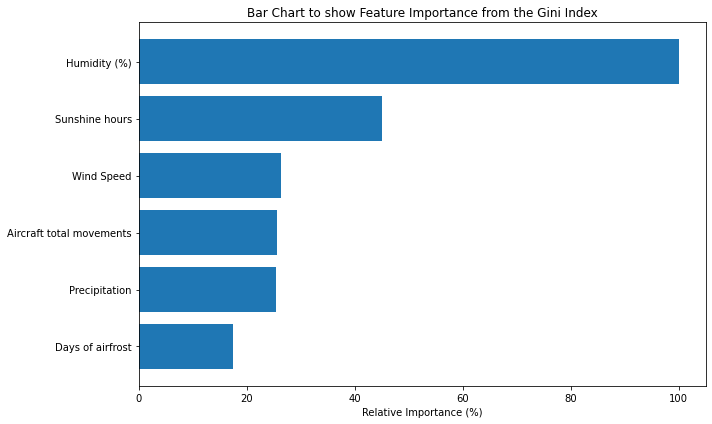

Humidity (%): 100.00%
Sunshine hours: 45.02%
Wind Speed: 26.27%
Aircraft total movements: 25.67%
Precipitation: 25.50%
Days of airfrost: 17.53%


In [48]:
rng = np.random.default_rng(0)

# Again we set n_features = (number of columns)/3 = 6/3 = 2
n_features = 2
B = 20

rf, gini_decreases, rf_size = train_rf_with_gini(B, n_features, X_train, y_train, cat_columns_dict)
importance_percentages = calculate_gini_importance(gini_decreases, rf_size)
plot_gini_importance(X_train, importance_percentages)

sorted_features = sorted(importance_percentages.items(), key=lambda x: x[1], reverse=True)
for feature_idx, importance in sorted_features:
    feature_name = X_train.columns[feature_idx]
    print(f"{feature_name}: {importance:.2f}%")

Our code has determined that the humidity percentage is the most important feature in determining the weather and flight condition category. The second and third most important features, sunshine hours and wind speed, are not even half as important. This may be due to high humidity decreasing pressure, as such more energy is required to generate lift.

The days of airfrost is the least important feature. This may be because the aircraft engine already produces heat and as such airfrost perhaps might not impact the difficulty of the flight as much.

<a name="task-14"></a>

## (1.4) [(index)](#index-task-14)

In [49]:
L = np.array([
    [0, 0.1, 1, 1],
    [0.1, 0, 1, 1],
    [1, 1, 0, 1],
    [1, 1, 1, 0]
])

In [50]:
# Modify the gini_index function to use the weighted version
def weighted_gini_index(y):
    """
    Arguments:
        y: vector of training labels, of shape (N,).
    Returns:
        (float): the weighted GINI-index for the labels in a given region.
    """
    
    # Count occurrences of each unique label in y
    unique_labels, counts = np.unique(y, return_counts=True)
    
    # Compute probabilities for each label
    p = counts / len(y)
    
    # Initialize weighted Gini index
    weighted_gini = 0
    
    # Compute the weighted Gini index using the given formula
    for q, label_q in enumerate(unique_labels):
        for q_prime, label_q_prime in enumerate(unique_labels):
            if q != q_prime:
                # Get indices for loss matrix
                weighted_gini += p[q] * p[q_prime] * L[label_q, label_q_prime]
    
    return weighted_gini

In [51]:
# Function is very similar to gini_split_value from Decision Tree Notebook
# Uses weighted_gini_index function instead of gini_index
def weighted_gini_split_value(X, y, column, categorical):
    """
    Calculate the weighted GINI-index based on `column` with the split that minimizes the GINI-index.
    Arguments:
        X: training features, of shape (N, p).
        y: vector of training labels, of shape (N,).
        column: the column index of the feature for calculating. 0 <= column < p
        categorical: boolean value indicating whether column is a categorical variable or numerical.
    Returns:
        (float, float): the resulted weighted GINI-index and the corresponding value used in splitting.
    """
    
    unique_vals = np.unique(X[:, column])

    assert len(unique_vals) > 1, f"There must be more than one distinct feature value. Column: {column}."

    gini_index_val, threshold = np.inf, None

    # iterate over all unique values of the i-th feature
    for value in unique_vals:
        # Split the samples into left and right subsets based on the current value
        (X_l, y_l), (X_r, y_r) = split_samples(X, y, column, value, categorical)

        # check if one of the subsets is empty (invalid split)
        if len(y_l) == 0 or len(y_r) == 0:
            continue

        # calculate the proportion of samples on the left and right sides
        p_left = len(y_l)/(len(y_l)+len(y_r))
        p_right = len(y_r)/(len(y_l)+len(y_r))

        # compute the weighted GINI index for the left and right subsets
        new_cost = p_left * weighted_gini_index(y_l) + p_right * weighted_gini_index(y_r)

        # update the minimum GINI index and the threshold if this split is better
        if new_cost < gini_index_val:
            gini_index_val, threshold = new_cost, value

    return gini_index_val, threshold

In [52]:
# Function is very similar to gini_split from Decision Tree Notebook
# Uses weighted_gini_index function instead of gini_index
def weighted_gini_split(X, y, cat_columns_dict):
    """
    Choose the best feature to split according to weighted Gini criterion.
    Args:
        X: training features, of shape (N, p).
        y: vector of training labels, of shape (N,).
        cat_columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
    Returns:
        (float, int, float): the minimal weighted Gini index found, the best feature index and value used in splitting.
        If the feature index is None, then no valid split for the current Node.
    """
    
    # Initialize `split_column` to None, so if None returned this means there is no valid split at the current node.
    min_gini_index = np.inf
    split_column = None
    split_val = np.nan

    for column, categorical in cat_columns_dict.items():
        # skip column if samples are not separable by that column.
        if len(np.unique(X[:, column])) < 2:
            continue
        gini_index, current_split_val = weighted_gini_split_value(X, y, column, categorical)

            
        if gini_index < min_gini_index:
            # Keep track with:

            # 1. the current minimum gini-index value,
            min_gini_index = gini_index

            # 2. corresponding column,
            split_column = column

            # 3. corresponding split threshold.
            split_val = current_split_val

    return min_gini_index, split_column, split_val

In [53]:
# Function is very similar to build_tree from Decision Tree Notebook
# Uses weighted_gini_index function instead of gini_index
def build_weighted_tree(X, y, cat_columns_dict, feature_names, depth, max_depth=10, min_samples_leaf=12):
    """Build the decision tree according to the data.
       Uses weighted gini index.
    Args:
        X: (np.array) training features, of shape (N, p).
        y: (np.array) vector of training labels, of shape (N,).
        cat_columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
        feature_names (list): record the name of features in X in the original dataset.
        depth (int): current depth for this node.
        max_depth (int): maximum depth of the tree.
        min_samples_leaf (int): minimum number of samples in a leaf node.
    Returns:
        (dict): a dict denoting the decision tree (binary-tree). Each parent node has seven attributes:
          1. 'feature_name': The column name of the split.
          2. 'feature_index': The column index of the split.
          3. 'value': The value used for the split.
          4. 'categorical': indicator for categorical/numerical variables.
          5. 'majority_label': For leaf nodes, this stores the dominant label. Otherwise, it is None.
          6. 'left': The left sub-tree with the same structure.
          7. 'right' The right sub-tree with the same structure.
    """
    # include a clause for the cases where (i) no feature, (ii) all labels are the same,
    # (iii) depth exceeded, or (iv) X is too small
    if len(np.unique(y))==1 or depth>max_depth or len(X)<=min_samples_leaf:
        return {'majority_label': majority_vote(y)}

    GI, split_index, split_val = weighted_gini_split(X, y, cat_columns_dict)

    # If no valid split at this node, use majority vote.
    if split_index is None:
        return {'majority_label': majority_vote(y)}

    categorical = cat_columns_dict[split_index]

    # Split samples (X, y) given column, split-value, and categorical flag.
    (X_l, y_l), (X_r, y_r) = split_samples(X, y, split_index, split_val, categorical)
    return {
        'feature_name': feature_names[split_index],
        'feature_index': split_index,
        'value': split_val,
        'categorical': categorical,
        'majority_label': None,
        'left': build_weighted_tree(X_l, y_l, cat_columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf),
        'right': build_weighted_tree(X_r, y_r, cat_columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf)
    }

In [54]:
# Function is very similar to train_f from Decision Tree Notebook
# Uses build_weighted_tree function instead of build_tree
def train_weighted(X, y, cat_columns_dict, max_depth=10):
    """
    Build the decision tree according to the training data using the weighted Gini index.
    Args:
        X: (pd.Dataframe) training features, of shape (N, p). Each X[i] is a training sample.
        y: (pd.Series) vector of training labels, of shape (N,). y[i] is the label for X[i], and each y[i] is
        an integer in the range 0 <= y[i] <= C. Here C = 1.
        cat_columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
        sample_weights: weights for each samples, of shape (N,).
    """
    
    feature_names = X.columns.tolist()
    X = X.to_numpy()
    y = y.to_numpy()
    return build_weighted_tree(X, y, cat_columns_dict, feature_names, depth=1, max_depth=max_depth)

In [55]:
def pairwise_accuracy(y_true, y_pred, class1, class2):
    """
    Calculate the pairwise accuracy for two specific classes.
    Args:
        y_true: (np.array) True labels.
        y_pred: (np.array) Predicted labels.
        class1: (int) Class label.
        class2: (int) Class label.
    Returns:
        float: Pairwise accuracy.
    """
    # Find samples that are in class 1 or class 2
    mask = (y_test == class1) | (y_test == class2)
    
    # Get the true and predicted labels
    y_true_subset = y_true[mask]
    y_pred_subset = y_pred[mask]
    
    # Calculate accuracy
    acc = np.mean(y_true_subset == y_pred_subset)
    
    return acc

In [56]:
standard_tree = train_f(X_train, y_train, cat_columns_dict)
weighted_tree = train_weighted(X_train, y_train, cat_columns_dict)

# Find accuracies
print('Training accuracy:', tree_score(standard_tree, X_train.to_numpy(), y_train.to_numpy()))
print('Test accuracy:', tree_score(standard_tree, X_test.to_numpy(), y_test.to_numpy()))
print('Training accuracy:', tree_score(weighted_tree, X_train.to_numpy(), y_train.to_numpy()))
print('Test accuracy:', tree_score(weighted_tree, X_test.to_numpy(), y_test.to_numpy()))

# Calculate pairwise accuracies
y_pred_standard = predict(standard_tree, X_test.to_numpy())
y_pred_weighted = predict(weighted_tree, X_test.to_numpy())

classes = np.unique(y_test)
rows = []

# Double for loop to find all unique combinations of the 4 classes (6 of them)
for i in range(len(classes)):
    for j in range(i+1, len(classes)):
        
        # Iterating over all pairs of classes, find the pairwise test accuracy for both the standard Gini and weighted Gini trees
        class1, class2 = classes[i], classes[j]
        standard_accuracy = pairwise_accuracy(y_test.to_numpy(), y_pred_standard, class1, class2)
        weighted_accuracy = pairwise_accuracy(y_test.to_numpy(), y_pred_weighted, class1, class2)
        
        # Store each combination
        rows.append({
            'Class Pair': f"{class1} vs {class2}",
            'Standard Gini Accuracy': standard_accuracy,
            'Weighted Gini Accuracy': weighted_accuracy,
        })

display(pd.DataFrame(rows))

Training accuracy: 0.9281961471103327
Test accuracy: 0.8530612244897959
Training accuracy: 0.9281961471103327
Test accuracy: 0.8612244897959184


,Class Pair,Standard Gini Accuracy,Weighted Gini Accuracy
0,0 vs 1,0.826446,0.842975
1,0 vs 2,0.832000,0.848000
2,0 vs 3,0.853659,0.869919
3,1 vs 2,0.852459,0.852459
4,1 vs 3,0.875000,0.875000
5,2 vs 3,0.879032,0.879032


We see that the standard Gini model and the weighted Gini model have very similar training and testing accuracies. However, the standard and weighted models have the same accuracy for the pairs (1,2), (1,3), and (2,3), whilst the weighted model performs better on the other 3 pairs.

The loss matrix weights certain misclassifications differently than others; since $L_{1,2}$ and $L_{2,1}$ are of smaller magnitude, we penalise misclassification between classes 0 and 1 less than other combinations.

The improved performance when class 0 is included may be due to the misclassification between class 0 and class 1 being overly penalised by the standard Gini model. As such when we reduce the magnitude of the values $L_{1,2}$ and $L_{2,1}$ our model is able to make more confident predictions regarding classes 0 and 1, leading to the model's splitting criteria being focused on more important misclassifications, leading to higher accuracies.

This is supported by the fact that classes 0 and 1 had a high AUC value of 0.94 earlier.

<a name="task-2"></a>

# Task 2: Binary classification with the Huberised Support Vector Machine [(index)](#index-task-2)

<a name="task-21"></a>

## (2.1) [(index)](#index-task-21)

$L(\mathbf{w},b) = \frac{1}{2} ||\mathbf{w}||^2 + \lambda \sum_{i=1}^{N_{\text{train}}} L_{c} (1 - (\mathbf{x}^{(i)} \cdot \mathbf{w} + b) y^{(i)}) \;$ where $L_c(z) =
\begin{cases}
0 & z \leq 0 \\
\frac{1}{2} z^2 & 0 < z \leq c \\
c(z - \frac{1}{2}c) & z>c.
\end{cases}$

By the chain rule we have 
$$ \begin{align*}
\nabla_\mathbf{w} L(\mathbf{w},b) &= \mathbf{w} + \lambda \sum_{i=1}^{N_{\text{train}}} \nabla_\mathbf{w} L_c (1 - (\mathbf{x}^{(i)} \cdot \mathbf{w} + b) y^{(i)}) \\
&= \mathbf{w} + \lambda \sum_{i=1}^{N_{\text{train}}} L_c'(1 - (\mathbf{x}^{(i)} \cdot \mathbf{w} + b) y^{(i)}) \, \nabla_\mathbf{w} (1 - (\mathbf{x}^{(i)} \cdot \mathbf{w} + b) y^{(i)}) \\
&= \mathbf{w} + \lambda \sum_{i=1}^{N_{\text{train}}} L_c'(1 - (\mathbf{x}^{(i)} \cdot \mathbf{w} + b) y^{(i)}) (-y^{(i)} \mathbf{x}^{(i)}) \\
&= \mathbf{w} - \lambda \sum_{i=1}^{N_{\text{train}}} \alpha_i y^{(i)} \mathbf{x}^{(i)}
\end{align*}$$

where $\alpha_i = L_c'(1 - (\mathbf{x}^{(i)} \cdot \mathbf{w} + b) y^{(i)})$ or equivalently
$\alpha_i =
\begin{cases}
0 & (1 - (\mathbf{x}^{(i)} \cdot \mathbf{w} + b) y^{(i)}) \leq 0 \\
1 - (\mathbf{x}^{(i)} \cdot \mathbf{w} + b) y^{(i)} & 0 < (1 - (\mathbf{x}^{(i)} \cdot \mathbf{w} + b) y^{(i)}) \leq c \\
c & (1 - (\mathbf{x}^{(i)} \cdot \mathbf{w} + b) y^{(i)})>c
\end{cases}$

Similarly we have 

$$ \begin{align*}
\nabla_b L(\mathbf{w},b) &= 0 + \lambda \sum_{i=1}^{N_{\text{train}}} \nabla_b L_c (1 - (\mathbf{x}^{(i)} \cdot \mathbf{w} + b) y^{(i)}) \\
&= \lambda \sum_{i=1}^{N_{\text{train}}} L_c'(1 - (\mathbf{x}^{(i)} \cdot \mathbf{w} + b) y^{(i)}) \, \nabla_b (1 - (\mathbf{x}^{(i)} \cdot \mathbf{w} + b) y^{(i)}) \\
&= \lambda \sum_{i=1}^{N_{\text{train}}} L_c'(1 - (\mathbf{x}^{(i)} \cdot \mathbf{w} + b) y^{(i)}) (-y^{(i)}) \\
&= - \lambda \sum_{i=1}^{N_{\text{train}}} \alpha_i y^{(i)}
\end{align*}$$

for the same $\alpha_i$.

In [57]:
display(X_train)
display(y_train)

,Days of airfrost,Precipitation,Sunshine hours,Humidity (%),Wind Speed,Aircraft total movements
0,24,59.9,58.5,79.3,5.1,1347
1,0,66.7,158.3,61.0,3.5,1306
2,0,39.5,194.6,57.9,3.2,1284
3,0,34.0,192.8,60.2,2.6,1270
4,8,17.7,50.3,79.7,2.9,1319
...,...,...,...,...,...,...
566,0,23.6,266.4,60.7,2.2,1238
567,14,42.7,105.2,56.5,3.9,1312
568,0,17.1,166.7,62.4,1.9,1300
569,3,84.8,81.3,68.3,4.3,1300


0      3
1      1
2      0
3      1
4      3
      ..
566    1
567    0
568    2
569    2
570    0
Name: Weather and flight condition category, Length: 571, dtype: int64

In [58]:
# Create a copy of y_train (as to not change the original series)
# Replace all 1s/2s/3s with a -1, followed by replacing all 0s with a 1
# If we do it the other way round then the 0s become -1s instead
y_train_svm = y_train.copy().replace([1, 2, 3], -1).replace([0],1)
y_test_svm = y_test.copy().replace([1, 2, 3], -1).replace([0],1)
display(y_train_svm)

0     -1
1     -1
2      1
3     -1
4     -1
      ..
566   -1
567    1
568   -1
569   -1
570    1
Name: Weather and flight condition category, Length: 571, dtype: int64

In [59]:
X_train_intercept = np.hstack((X_train_std, np.ones((len(X_train_std), 1))))
X_test_intercept = np.hstack((X_test_std, np.ones((len(X_test_std), 1))))

In [60]:
# Function is based on compute_loss from SVM Notebook
def compute_huberised_loss(w, X, y, regul_strength=1e5, c=1.0):
    """
    Compute the loss function for linear SVM.

    Parameters:
        w (np.array): Vector of weights (incl. bias).
        X (np.array): Input features.
        y (np.array): Labels.
        regul_strength (float): Regularisation parameter.
        c (float): Huber parameter.

    Returns:
        loss (float): Loss function as given by the equation above.
    """

    n = X.shape[0]
    distances = 1- y*(X @ w)
    
    # We now implement the huberised loss
    # We initialise an array of the same size as distances with all 0s
    # This will account for Case 1 (z<=0) since the loss here is 0
    huberised_losses = np.zeros_like(distances)
    
    # Case 2 (0<z<=c)
    # Find all indices where the 0<distance<=c
    # Set the loss as 1/2 distance^2
    mask1 = (distances > 0) & (distances <= c)
    huberised_losses[mask1] = 1/2 * distances[mask1]**2
    
    # Case 3 (z>c)
    # Find all indices where the distance>c
    # Set the loss as c(distance - c/2)
    mask2 = distances > c
    huberised_losses[mask2] = c * (distances[mask2] - c/2)
    
    loss_sum = np.sum(huberised_losses)

    # Calculate the final loss L(w,b)
    return 0.5 * np.dot(w, w) + regul_strength * loss_sum - 0.5 * w[-1] ** 2
    # the vector w has the bias term at the end - we remove this in the 0.5 * w[-1] ** 2 term

In [61]:
# Function is based on calculate_loss from SVM Notebook
def calculate_huberised_loss_gradient(w, X_batch, y_batch, regul_strength=1e6, c=1.0):
    """
    Calculate gradient of the Huberised loss.
    Parameters:
        w (np.array): Vector of weights (incl. bias).
        X_batch (np.array): Batch of input features.
        y_batch (np.array): Batch of labels.
        regul_strength (float): Regularisation parameter.
        c (float): Huber parameter.
    Returns:
        grad_w (float): Gradient of the loss with respect to w.
    """
    
    # If only one sample is passed
    if type(y_batch) == np.float64:
        y_batch = np.asarray([y_batch])
        X_batch = np.asarray([X_batch])  # gives multidimensional array
        
    distance = 1 - (y_batch * (X_batch @ w))
    dw = np.zeros(len(w))
    
    we = w.copy() # So as not to overwrite w
    we[-1] = 0 # So as not to have b in its derivative when adding the weights in di
    
    for ind, d in enumerate(distance):
        # Case 1 (z<=0)
        if d <= 0:
            di = we
        # Case 2 (0<z<=c)
        elif d <= c:
            di = we - (regul_strength * d * y_batch[ind] * X_batch[ind])
        # Case 3 (z>c)
        else:
            di = we - (regul_strength * c * y_batch[ind] * X_batch[ind])
            
        dw += di
        
    dw /= len(y_batch)  # average
    
    return dw

In [62]:
# Function is based on mini_batch_gradient_descent from SVM Notebook
def mini_batch_gradient_descent(X, y, loss_func, loss_grad_func, c_required, batch_size=32, max_iterations=2000, stop_criterion=0.001, learning_rate=1e-5, regul_strength=1e6, c=1.0, print_outcome=False):
    """
    Performs mini-batch stochastic gradient descent to optimise weights.
    Can now be used with multiple loss functions (huberised and hinge).

    Parameters:
        X (np.array): The feature matrix.
        y (np.array): The target labels.
        loss_func: The loss function to be used.
        loss_grad_func: The gradient of the loss function.
        c_required (bool): Whether to pass c as a parameter of the loss and gradient (required for huberised SVM).
        batch_size (int): Size of each mini-batch.
        max_iterations (int): Maximum number of iterations.
        stop_criterion (float): Percentage change in loss function to determine convergence.
        learning_rate (float): Learning rate for gradient updates.
        regul_strength (float): Regularisation parameter
        print_outcome (bool): Whether to print progress during training.

    Returns:
        weights (np.array): Optimised weights.
        loss_history (list): History of loss.
        iteration_list (list): List of iteration numbers corresponding to the loss values.

    """
    # Initialise weights to zero
    weights = np.zeros(X.shape[1])
    nth = 0
    prev_loss = np.inf  # Initialise starting loss as infinity
    loss_history = []  # Track loss values
    iteration_list = []  # Track iteration numbers

    for iteration in range(1, max_iterations+1):
        # Shuffle data to prevent repeating update cycles
        indices = np.random.permutation(len(y))
        X_shuffled, y_shuffled = X[indices], y[indices]

        # Create mini-batches
        for start_idx in range(0, len(y), batch_size):
            end_idx = start_idx + batch_size
            X_batch = X_shuffled[start_idx:end_idx]
            y_batch = y_shuffled[start_idx:end_idx]

            # Compute the gradient for the mini-batch
            if c_required == True:
                gradient = loss_grad_func(weights, X_batch, y_batch, regul_strength, c) ## <-- SOLUTION
            else:
                gradient = loss_grad_func(weights, X_batch, y_batch, regul_strength)

            # Update weights
            weights = weights - (learning_rate * gradient)

        # Check for convergence at 2^nth iteration or last iteration
        if iteration == 2**nth or iteration == max_iterations:
            # Compute the current loss
            if c_required == True:
                loss = loss_func(weights, X, y, regul_strength, c)
            else:
                loss = loss_func(weights, X, y, regul_strength)
            if print_outcome:
                print(f'Iteration: {iteration}, Loss: {loss:.6f}')

            # Check if the stop criterion is met
            if abs(prev_loss - loss) < stop_criterion * prev_loss:
                return weights, loss_history, iteration_list

            # Update tracking variables
            prev_loss = loss
            iteration_list.append(iteration)
            loss_history.append(loss)
            nth += 1

    return weights, loss_history, iteration_list


In [63]:
np.random.seed(0)
regul_strength_huber = 100
w_huber, loss_history_huber, iterations_huber = mini_batch_gradient_descent(X_train_intercept, y_train_svm.to_numpy(), compute_huberised_loss, calculate_huberised_loss_gradient, True, max_iterations=2000, stop_criterion=0.001, learning_rate=1e-4, regul_strength=regul_strength_huber, c=1.0, print_outcome=True)
print('Training finished.')

Iteration: 1, Loss: 24589.985896
Iteration: 2, Loss: 22020.909794
Iteration: 4, Loss: 18962.400520
Iteration: 8, Loss: 16063.675230
Iteration: 16, Loss: 13728.224743
Iteration: 32, Loss: 11457.377807
Iteration: 64, Loss: 9367.803802
Iteration: 128, Loss: 7800.616126
Iteration: 256, Loss: 6738.043243
Iteration: 512, Loss: 6191.006931
Iteration: 1024, Loss: 6005.754418
Iteration: 2000, Loss: 5977.651059
Training finished.


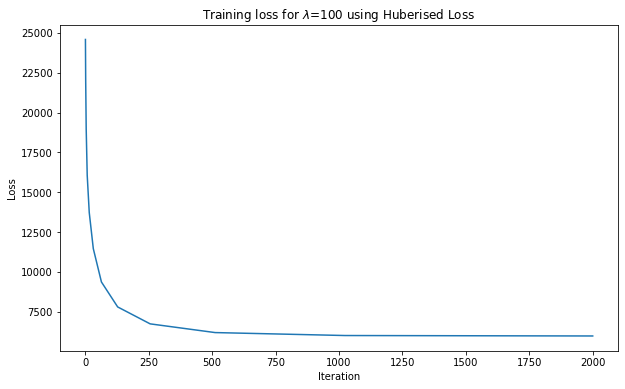

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(iterations_huber, loss_history_huber)
plt.title(f'Training loss for $\lambda$={regul_strength_huber} using Huberised Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

We can see that when $\lambda = 100$ the training (Huber) loss decreases rapidly in the first 250 iterations, slowing down dramatically thereon after.

In [65]:
# Function copied from SVM Notebook
def compute_hinge_loss(w, X, y, regul_strength=1e5):
    """
    Compute the loss function for linear SVM.

    Parameters:
        w (np.array): Vector of weights (incl. bias).
        X (np.array): Input features.
        y (np.array): Labels.
        regul_strength (float): Regularisation parameter.

    Returns:
        loss (float): Loss function as given by the equation above.

    """

    n = X.shape[0]
    distances = 1 - y * (X @ w)
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge = distances.sum()

    # calculate loss
    return 0.5 * np.dot(w, w) + regul_strength * hinge - 0.5 * w[-1] ** 2

In [66]:
# Function copied from SVM Notebook
def calculate_hinge_loss_gradient(w, X_batch, y_batch, regul_strength=1e6):
    """
    Calculate gradient of the loss.

    Parameters:
        w (np.array): Vector of weights (incl. bias).
        X_batch (np.array): Batch of input features.
        y_batch (np.array): Batch of labels.
        regul_strength (float): Regularisation parameter.

    Returns:
        grad_w (float): Gradient of the loss with respect to w.

    """

    # If only one sample is passed
    if type(y_batch) == np.float64:
        y_batch = np.asarray([y_batch])
        X_batch = np.asarray([X_batch])  # gives multidimensional array

    distance = 1 - (y_batch * (X_batch @ w))
    dw = np.zeros(len(w))

    we = w.copy() # So as not to overwrite w
    we[-1] = 0 # So as not to have b in its derivative when adding the weights in di

    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = we
        else:
            di = we - (regul_strength * y_batch[ind] * X_batch[ind])
        dw += di

    dw /= len(y_batch) # average

    return dw

In [67]:
np.random.seed(0)
regul_strength_hinge = 100
w_hinge, loss_history_hinge, iterations_hinge = mini_batch_gradient_descent(X_train_intercept, y_train_svm.to_numpy(), compute_hinge_loss, calculate_hinge_loss_gradient, False, max_iterations=2000, stop_criterion=0.001, learning_rate=1e-4, regul_strength=regul_strength_hinge, print_outcome=True)
print('Training finished.')

Iteration: 1, Loss: 52163.591967
Iteration: 2, Loss: 47312.312872
Iteration: 4, Loss: 39996.874400
Iteration: 8, Loss: 32878.639803
Iteration: 16, Loss: 26300.634586
Iteration: 32, Loss: 24268.941725
Iteration: 64, Loss: 21659.905864
Iteration: 128, Loss: 17250.847413
Iteration: 256, Loss: 13697.499986
Iteration: 512, Loss: 12203.617760
Iteration: 1024, Loss: 11803.122640
Iteration: 2000, Loss: 11709.834729
Training finished.


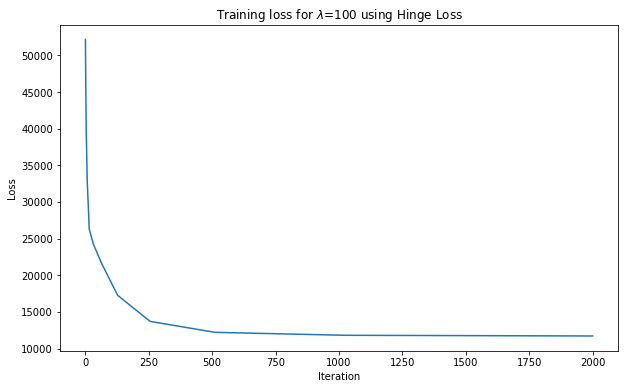

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(iterations_hinge, loss_history_hinge)
plt.title(f'Training loss for $\lambda$={regul_strength_hinge} using Hinge Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

Again with $\lambda = 100$ but this time using the hinge loss, the training loss also decreases rapidly in the first 250 iterations, although converging to a slightly higher loss value of 10000 compared to 7500.

In [69]:
# Function copied from SVM Notebook
def score(w, X, y):
    """
    Computes the mean accuracy.

    Parameters:
        w (np.array): Vector of weights (incl. bias).
        X (np.array): The feature matrix.
        y (np.array): The target labels.

    Returns:
        mean_accuracy (np.array): Optimised weights.

    """
    y_preds = np.sign(X @ w)
    mean_accuracy = np.mean(y_preds == y) ## <-- SOLUTION

    return mean_accuracy

In [70]:
accuracy_huber_train = score(w_huber, X_train_intercept, y_train_svm.to_numpy())
accuracy_huber_test = score(w_huber, X_test_intercept, y_test_svm.to_numpy())

accuracy_hinge_train = score(w_hinge, X_train_intercept, y_train_svm.to_numpy())
accuracy_hinge_test = score(w_hinge, X_test_intercept, y_test_svm.to_numpy())

print('Accuracy on training set for Huber:', accuracy_huber_train)
print('Accuracy on test set for Huber:', accuracy_huber_test)
print()
print('Accuracy on training set for Hinge:', accuracy_hinge_train)
print('Accuracy on test set for Hinge:',accuracy_hinge_test)

Accuracy on training set for Huber: 0.9474605954465849
Accuracy on test set for Huber: 0.9346938775510204

Accuracy on training set for Hinge: 0.9509632224168126
Accuracy on test set for Hinge: 0.9346938775510204


Huberised Loss SVM - Accuracy: 0.9347, Outside Margin: 30
Hinge Loss SVM - Accuracy: 0.9347, Outside Margin: 28


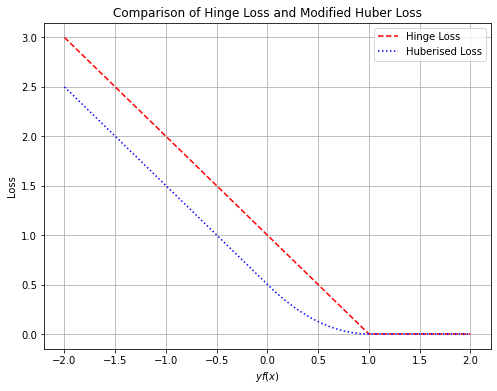

In [71]:
# Compute the number of training data points that fall outside the margin
outside_margin_huber = np.sum(1 - y_train_svm.to_numpy() * (X_train_intercept @ w_huber) > 1)
outside_margin_hinge = np.sum(1 - y_train_svm.to_numpy() * (X_train_intercept @ w_hinge) > 1)

print(f"Huberised Loss SVM - Accuracy: {accuracy_huber_test:.4f}, Outside Margin: {outside_margin_huber}")
print(f"Hinge Loss SVM - Accuracy: {accuracy_hinge_test:.4f}, Outside Margin: {outside_margin_hinge}")

# These loss functions are almost identical to compute_hinge_loss/compute_huberised_loss
# Instead we return distances only
def hinge_loss(yf):

    distances = 1 - yf
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    
    return distances

def huberised_loss(yf, c=1.0):

    distances = 1-yf
    
    # We now implement the huberised loss
    # We initialise an array of the same size as distances with all 0s
    # This will account for Case 1 (z<=0) since the loss here is 0
    huberised_losses = np.zeros_like(distances)
    
    # Case 2 (0<z<=c)
    # Find all indices where the 0<distance<=c
    # Set the loss as 1/2 distance^2
    mask1 = (distances > 0) & (distances <= c)
    huberised_losses[mask1] = 1/2 * distances[mask1]**2
    
    # Case 3 (z>c)
    # Find all indices where the distance>c
    # Set the loss as c(distance - c/2)
    mask2 = distances > c
    huberised_losses[mask2] = c * (distances[mask2] - c/2)
    
    return huberised_losses

yf_values = np.linspace(-2, 2, 400)
hinge_losses = hinge_loss(yf_values)
huber_losses = huberised_loss(yf_values)

plt.figure(figsize=(8, 6))
plt.plot(yf_values, hinge_losses, label="Hinge Loss", linestyle="--", color="red")
plt.plot(yf_values, huber_losses, label="Huberised Loss", linestyle=":", color="blue")
plt.xlabel(r"$y f(x)$")
plt.ylabel("Loss")
plt.title("Comparison of Hinge Loss and Modified Huber Loss")
plt.legend()
plt.grid()
plt.show()

The graph above shows that both loss functions do not penalise when $y f(x) >1$. This indicates that they do not penalise correct classifications outside the margin.

The graph also shows that the Huberised loss has quadratic behaviour compared to the hinge loss' linear behvaiour close to the just to the left of $y f(x) =1$ (when $0< y f(x) < 1$ the points are classified correctly but are inside the margin). The hinge loss therefore penalises points that are correctly classified but are close to the decision boundary more aggressively than the Huberised loss.

When $y f(x) < 0 $, i.e. misclassification, both losses are linear, but the hinge loss penalises slightly more.

Both losses have the same accuracy, indicating that the number of correctly classfied points is the same. The huberised loss has slightly more points outside the margin, and as such we note that the difference in loss function affects the decision boundary. Since both loss functions have the desired general behaviour in all regions, we note that the decision boundary is not affected too much and we have a simialr numebr of poitns outside the margin for both losses.

As such, the Huberised loss gives similar accuracy to the regular hinge loss. This means we are able to use a smooth function without sacrificing performance, which is useful in optimisation contexts where we are interested in taking gradients.

<a name="task-22"></a>

## (2.2) [(index)](#index-task-22)

In [72]:
# Function copied from SVM Notebook
def cross_val_split(num_samples, num_folds):
    """
    Splits the dataset indices into `num_folds` folds for cross-validation.

    Parameters:
        num_samples (int): The total number of samples in the dataset.
        num_folds (int): The number of folds for cross-validation.

    Returns:
        fold (list[np.array]): A list of numpy arrays containing the indices defining the validation set for one fold.
    """
    
    # np.random.seed(0)
    fold_size = num_samples // num_folds
    shuffled_indices = np.random.permutation(np.arange(num_samples))
    folds = [
        shuffled_indices[k * fold_size : (k + 1) * fold_size]
        for k in range(num_folds)
    ]

    return folds

In [73]:
# Function based on cross_val_evaluate from SVM Notebook
def cross_val_evaluate(data, num_folds, c_values, regul_strength_values):
    """
    Performs T-fold cross-validation on the given dataset to find the optimal (c,regul_strength) pair/tuple.

    Parameters:
        data (np.array): The dataset, where the last column contains the target labels.
        num_folds (int): The number of folds for cross-validation.
        c_values (list): A list of Huber parameter values to evaluate.
        regul_strength_values (list): A list of regularisation strength values to evaluate.

    Returns:
        tuple: A tuple containing two lists and two integers:
            - train_scores (np.array): Accuracy scores on the training set for each (c,regul_strength) pair.
            - val_scores (np.array): Accuracy scores on the validation set for each (c,regul_strength) pair.
            - best_hyperparams[0] (int): Best c value.
            - best_hyperparams[1] (int): Best regul_strength value.
    """
    
    folds = cross_val_split(data.shape[0], num_folds)
    
    # Initialise additional variables so we can automatically find the best (hyper)parameters
    best_val_score = -np.inf
    best_train_score = -np.inf
    best_hyperparams = None
    
    # Create 2D arrays to store scores for all combinations
    train_scores = np.zeros((len(c_values), len(regul_strength_values)))
    val_scores = np.zeros((len(c_values), len(regul_strength_values)))
    
    # Iterate over each fold for all pairs (c,regul_strength) [see the 3 for loops below]
    for k, c in enumerate(c_values):
        np.random.seed(0)
        
        for j, regul_strength in enumerate(regul_strength_values):
            np.random.seed(0)
            
            print(f'\nEvaluating c: {c}, regul_strength: {regul_strength}')
            
            for i, val_indices in enumerate(folds):
                np.random.seed(0)
                
                # Define the training and validation sets
                train_indices = np.setdiff1d(np.arange(data.shape[0]), val_indices)
                X_train, y_train = data[train_indices, :-1], data[train_indices, -1]
                X_val, y_val = data[val_indices, :-1], data[val_indices, -1]
                
                # We standardise both training and validation sets
                X_train_std = standardise(X_train)
                X_val_std = standardise(X_val, X_train)
                
                # Add intercept term (bias) to the feature matrices
                X_train = np.hstack((X_train_std, np.ones((len(X_train_std), 1))))
                X_val = np.hstack((X_val_std, np.ones((len(X_val_std), 1))))
                
                # Train the model using mini-batch stochastic gradient descent
                weights, _, _ = mini_batch_gradient_descent(
                    X_train, y_train, compute_huberised_loss, calculate_huberised_loss_gradient, True, 32,
                    max_iterations=2000,
                    stop_criterion=0.001,
                    learning_rate=1e-4,
                    regul_strength=regul_strength,
                    c=c
                )
                
                # Evaluate performance on validation set for the corresponding fold
                train_scores[k,j] += score(weights, X_train, y_train) / num_folds
                val_scores[k,j] += score(weights, X_val, y_val) / num_folds
            
            print(f'Training score: {train_scores[k,j]}')
            print(f'Validation score: {val_scores[k,j]}')
            
            # Check if this combination of hyperparameters is optimal (so far)
            # If the validation scores are equal, choose the pair with the highest train accuracy
            if (val_scores[k,j] > best_val_score) or (val_scores[k,j] == best_val_score and train_scores[k,j] > best_train_score):
                best_val_score = val_scores[k,j]
                best_train_score = train_scores[k,j]
                best_hyperparams = (c, regul_strength)
    
    print(f'Best hyperparameters: c = {best_hyperparams[0]}, lambda = {best_hyperparams[1]}')
    return train_scores, val_scores, best_hyperparams[0], best_hyperparams[1]

In [74]:
train2 = pd.concat([X_train, y_train_svm], axis=1)
display(train2)
test2 = pd.concat([X_test, y_test_svm], axis=1)
c_values = [0.5,1.0,10]
regul_strength_values = [1,100,10000]
np.random.seed(0)
train_scores, val_scores, best_c, best_lambda = cross_val_evaluate(train2.to_numpy(), 5, c_values, regul_strength_values)
print()
print(f"Optimal c: {best_c}, Optimal lambda: {best_lambda}")

,Days of airfrost,Precipitation,Sunshine hours,Humidity (%),Wind Speed,Aircraft total movements,Weather and flight condition category
0,24,59.9,58.5,79.3,5.1,1347,-1
1,0,66.7,158.3,61.0,3.5,1306,-1
2,0,39.5,194.6,57.9,3.2,1284,1
3,0,34.0,192.8,60.2,2.6,1270,-1
4,8,17.7,50.3,79.7,2.9,1319,-1
...,...,...,...,...,...,...,...
566,0,23.6,266.4,60.7,2.2,1238,-1
567,14,42.7,105.2,56.5,3.9,1312,1
568,0,17.1,166.7,62.4,1.9,1300,-1
569,3,84.8,81.3,68.3,4.3,1300,-1



Evaluating c: 0.5, regul_strength: 1
Training score: 0.725164113785558
Validation score: 0.7175438596491228

Evaluating c: 0.5, regul_strength: 100
Training score: 0.9466083150984683
Validation score: 0.9421052631578948

Evaluating c: 0.5, regul_strength: 10000
Training score: 0.948796498905908
Validation score: 0.9385964912280702

Evaluating c: 1.0, regul_strength: 1
Training score: 0.7514223194748358
Validation score: 0.7508771929824561

Evaluating c: 1.0, regul_strength: 100
Training score: 0.9466083150984683
Validation score: 0.9456140350877194

Evaluating c: 1.0, regul_strength: 10000
Training score: 0.9466083150984682
Validation score: 0.9333333333333333

Evaluating c: 10, regul_strength: 1
Training score: 0.7514223194748358
Validation score: 0.7508771929824561

Evaluating c: 10, regul_strength: 100
Training score: 0.9487964989059081
Validation score: 0.9456140350877194

Evaluating c: 10, regul_strength: 10000
Training score: 0.9374179431072209
Validation score: 0.92982456140350

Here we find that the hyperparameter pairs $(c,\lambda)= (1,100)$ and $(10,100)$ give the joint highest training score. Usually to break ties we would adjust other parameters, like the number of folds T; since we are interested in the specific value $T=5$ we instead break ties by choosing the pair with the highest training score. While a higher validation score indicates greater generalisation power, if these are tied then choosing the pair which performs better on the training set gives us a better choice of hyperparamters given the information we currently can access (the dataset).

This gives us the optimal hyperparameter pair as $(c,\lambda)= (10,100)$.

In [75]:
print(train_scores)

[[0.72516411 0.94660832 0.9487965 ]
 [0.75142232 0.94660832 0.94660832]
 [0.75142232 0.9487965  0.93741794]]


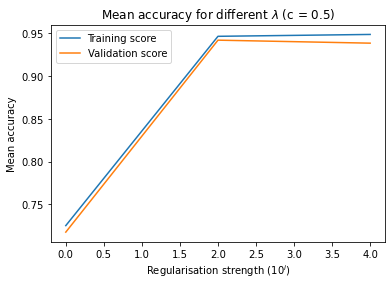

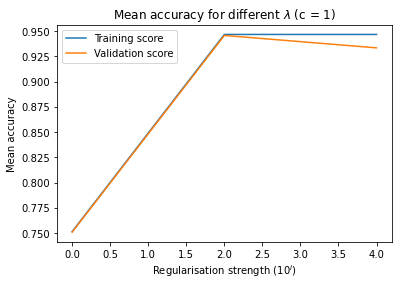

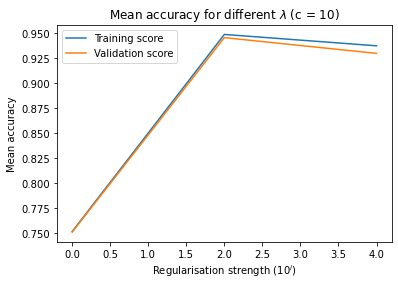

In [76]:
# Code copied from SVM Notebook
c_values = [0.5, 1, 10]
for i in range(3):
    plt.plot([0,2,4], train_scores[i], label='Training score')
    plt.plot([0,2,4], val_scores[i], label='Validation score')
    plt.legend()
    plt.title(f'Mean accuracy for different $\lambda$ (c = {c_values[i]})')
    plt.xlabel('Regularisation strength ($10^i$)')
    plt.ylabel('Mean accuracy')
    plt.show()

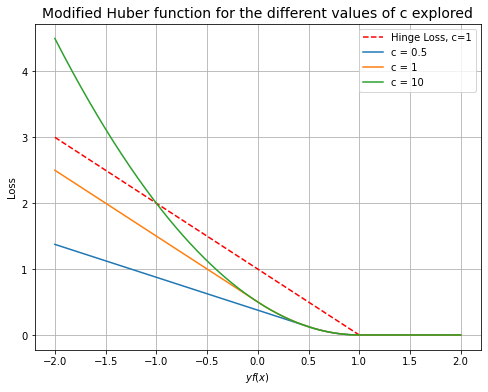

In [77]:
yf_values = np.linspace(-2, 2, 500)
c_values = [0.5,1,10]
labels = [f'c = {c}' for c in c_values]

hinge_losses = hinge_loss(yf_values)

plt.figure(figsize=(8, 6))
plt.plot(yf_values, hinge_losses, label="Hinge Loss, c=1", linestyle="--", color="red")
for i, c in enumerate(c_values):
    loss = huberised_loss(yf_values, c)
    plt.plot(yf_values, loss, label=labels[i])
plt.xlabel(r"$y f(x)$")
plt.ylabel('Loss')
plt.title('Modified Huber function for the different values of c explored', fontsize=14)
plt.legend()
plt.grid()
plt.show()

The graph above shows how the huberised loss behaves for different values of c, as well as the hinge loss' behaviour when $c=1$.

For the huberised losses it is clear that increasing the value of c increases the range of values for which the loss is quadratic. 

When c is greater the loss switches to linear behaviour much slower, and the gradient of the linear section is also steeper. As such a greater value of c makes the loss function more sensitive to severe misclassifications (in the linear section when $yf(x)<-1$), and as such the SVM algorithm will correct these misclassifications more aggressively, and may consider other points (e.g. close to being misclassified) as less important.

As discussed earlier the hinge loss does not have the smooth behaviour like the huberised losses do.

Iteration: 1, Loss: 24618.158830
Iteration: 2, Loss: 22065.096902
Iteration: 4, Loss: 19019.272792
Iteration: 8, Loss: 16140.093334
Iteration: 16, Loss: 13701.987602
Iteration: 32, Loss: 11404.673644
Iteration: 64, Loss: 9400.013603
Iteration: 128, Loss: 7884.560843
Iteration: 256, Loss: 6847.317598
Iteration: 512, Loss: 6306.832226
Iteration: 1024, Loss: 6115.463222
Iteration: 2000, Loss: 6089.346700
Training finished.


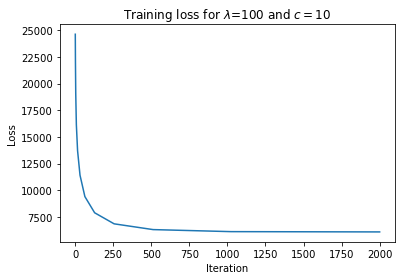

Accuracy on training set: 0.9457092819614711
Accuracy on test set: 0.9428571428571428


In [78]:
w, loss_history, iterations = mini_batch_gradient_descent(X_train_intercept, y_train_svm.to_numpy(), compute_huberised_loss, calculate_huberised_loss_gradient, True, max_iterations=2000, stop_criterion=0.001, learning_rate=1e-4, regul_strength=100, c=10, print_outcome=True)

print('Training finished.')
plt.plot(iterations, loss_history)
plt.title(f'Training loss for $\lambda$=100 and $c=10$')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

print('Accuracy on training set: {}'.format(score(w, X_train_intercept, y_train_svm)))
print('Accuracy on test set: {}'.format(score(w, X_test_intercept, y_test_svm)))

Here we have retrained the classifier with the optimal hyperparameters $(c,\lambda)= (10,100)$. We note that we have a high training accuracy which does not decrease significantly when considering the accuracy on the testing set, suggesting that our model is learning from the data well (and not overfitting to noise for example).

Compared to the classifier from 2.1 using the Huberised loss ($c=1$, $\lambda=100$), we have a similar testing accuracy (0.9346938775510204). We note a slightly greater accuracy on the test set with the optimal hyperparameters. This agrees with the procedure we used to choose the optimal hyperparameters: by maximising the validation accuracy over the possible hyperparameter pairs we choose the best performance on unseen data, which is exactly what the test set is. 

In [79]:
def calculate_balanced_accuracy(X, y, weights):
    """
    Calculate the balanced accuracy of an SVM classifier.
    
    Parameters:
        X (np.array): The feature matrix.
        y (np.array): The target labels.
        w (np.array): Vector of weights (incl. bias).
    
    Returns:
        float: The balanced accuracy.
    """
    
    y_preds = np.sign(X @ weights)
    
    # Find the indices for each class (1 and -1 in SVM)
    pos_indices = y == 1
    neg_indices = y == -1
    
    # Find the true positive rate
    tp = np.sum((y_preds == 1) & (y == 1))
    fn = np.sum((y_preds == -1) & (y == 1))
    tpr = tp/(tp + fn)
    
    # Find the true negative rate
    tn = np.sum((y_preds == -1) & (y == -1))
    fp = np.sum((y_preds == 1) & (y == -1))
    tnr = tn/(tn + fp)
    
    # Find the balanced accuracy as the average of the sensitivity and specificity
    balanced_accuracy = (tpr+tnr)/2
    
    return balanced_accuracy

test_balanced_acc = calculate_balanced_accuracy(X_test_intercept, y_test_svm.to_numpy(), w)
print("Test Balanced Accuracy: ", test_balanced_acc)

Test Balanced Accuracy:  0.9137581526529173


In [80]:
print((y_train_svm == 1).sum())
print((y_train_svm == -1).sum())
print((y_test_svm == 1).sum())
print((y_test_svm == -1).sum())

142
429
62
183


The balanced accuracy gives equal weights to classes, independent of their proportions in the dataset. This is ideal for imbalanced datasets which we have: in both the training and testing datasets we have approximately triple the number of elements classified as -1 than 1. The balanced accuracy is slightly lower than the (test set) standard/unbalanced accuracy, indicating that the model has become biased towards the majority class (-1) and hence performs better on the majority class. This is to be expected; if one class has a greater proportion of entries in the training dataset, the model will prioritise performance on this class as it represents a greater proportion of the dataset. Ensuring both classes take equal weight will therefore reduce the accuracy, which we observe.

<a name="task-3"></a>

# Task 3: Regression with the Multi-Layer Perceptron [(index)](#index-task-3)

<a name="task-31"></a>

## (3.1) [(index)](#index-task-31)

In [81]:
display(train)

,Days of airfrost,Precipitation,Sunshine hours,Humidity (%),Wind Speed,Aircraft total movements,Weather and flight condition category,Runway surface minimal temperature,Runway surface maximal temperature
0,24,59.9,58.5,79.3,5.1,1347,3,-2.6,3.8
1,0,66.7,158.3,61.0,3.5,1306,1,11.5,20.0
2,0,39.5,194.6,57.9,3.2,1284,0,8.6,16.8
3,0,34.0,192.8,60.2,2.6,1270,1,12.2,22.4
4,8,17.7,50.3,79.7,2.9,1319,3,2.3,9.5
...,...,...,...,...,...,...,...,...,...
566,0,23.6,266.4,60.7,2.2,1238,1,16.7,28.2
567,14,42.7,105.2,56.5,3.9,1312,0,1.4,8.5
568,0,17.1,166.7,62.4,1.9,1300,2,10.8,20.1
569,3,84.8,81.3,68.3,4.3,1300,2,4.6,11.4


In [82]:
X_train2 = train.drop(train.columns[6:],axis=1)
X_test2 = test.drop(test.columns[6:],axis=1)

display(X_train2)

y_train2 = train[train.columns[7:]]
y_test2 = test[test.columns[7:]]

display(y_train2)

y_train2 = y_train2.astype(int)
y_test2 = y_test2.astype(int)

,Days of airfrost,Precipitation,Sunshine hours,Humidity (%),Wind Speed,Aircraft total movements
0,24,59.9,58.5,79.3,5.1,1347
1,0,66.7,158.3,61.0,3.5,1306
2,0,39.5,194.6,57.9,3.2,1284
3,0,34.0,192.8,60.2,2.6,1270
4,8,17.7,50.3,79.7,2.9,1319
...,...,...,...,...,...,...
566,0,23.6,266.4,60.7,2.2,1238
567,14,42.7,105.2,56.5,3.9,1312
568,0,17.1,166.7,62.4,1.9,1300
569,3,84.8,81.3,68.3,4.3,1300


,Runway surface minimal temperature,Runway surface maximal temperature
0,-2.6,3.8
1,11.5,20.0
2,8.6,16.8
3,12.2,22.4
4,2.3,9.5
...,...,...
566,16.7,28.2
567,1.4,8.5
568,10.8,20.1
569,4.6,11.4


In [83]:
# Function copied from MLP Notebook
def dense(X, W, b):
    """Full-connected MLP layer.

    Parameters:
        X (np.ndarray): K x h_in array of inputs, where K is the batch size and h_in is the input dimension.
        W (np.ndarray): h_out x h_in array for weights matrix parameters, where h_out is the output dimension.
        b (np.ndarray): Length h_out 1-D array for bias parameters

    Returns:
        a (np.ndarray): K x h_out array of pre-activations
    """
    a = np.vstack([W @ x + b for x in X])
    return a

In [84]:
# Function copied from MLP Notebook
def relu_activation(a):
    """ReLU activation function.

    Parameters:
        a: K x h_out array of pre-activations

    Returns:
        h: K x h_out array of post-activations
    """
    # compute post-activations
    h = np.maximum(a, 0.)
    return h

# Function copied from MLP Notebook
def grad_relu_activation(a):
    """Gradient of ReLU activation function.

    Parameters:
        a: K x h_out array of pre-activations

    Returns:
        grad: K x h_out gradient array of post-activations
    """
    # compute gradient
    grad = np.zeros_like(a)
    grad[a>0] = 1
    return grad

In [85]:
# Function copied from MLP Notebook
def tanh_activation(a):
    """Tanh activation function.

    Parameters:
        a: K x h_out array of pre-activations

    Returns:
        h: K x h_out array of post-activations
    """
    # compute post-activations
    h = 2 / (1 + np.exp(-2*a)) - 1
    return h

# Function copied from MLP Notebook
def grad_tanh_activation(a):
    """Gradient of Tanh activation function.

    Parameters:
        a: K x h_out array of pre-activations

    Returns:
        grad: K x h_out gradient array of post-activations
    """
    # compute gradient
    grad = 1 - tanh_activation(a)**2
    return grad

In [86]:
# Function copied from MLP Notebook
def sigmoid_activation(a):
    """Sigmoid activation function. We implement here a numerically stable version
    where sigmoid(a) = 1/(1+exp(-a)) when a => 0 and sigmoid(a) = exp(a)/(1+exp(a))
    when a < 0.

    Parameters:
        a: K x h_out array of pre-activations

    Returns:
        h: K x h_out array of post-activations
    """

    # handle scalar inputs
    if np.isscalar(a):
        a = np.array([a])

    # determine indices where a is positive or negative
    positive = a >= 0
    negative = ~positive

    # compute sigmoid for positive a
    h = np.empty_like(a, dtype=float)
    h[positive] = 1 / (1 + np.exp(-a[positive]))

    # compute sigmoid for negative a
    exp = np.exp(a[negative])
    h[negative] = exp / (exp + 1)

    return h

# Function copied from MLP Notebook
def grad_sigmoid_activation(a):
    """Gradient of Sigmoid activation function.

    Parameters:
        a: K x h_out array of pre-activations.

    Returns:
        grad: K x h_out gradient array of post-activations.
    """
    # compute gradient
    grad = sigmoid_activation(a) * (1 - sigmoid_activation(a))
    return grad

In [87]:
# Code copied from MLP Notebook
# A lookup table for activation functions by their names.
activation_table = {
    "relu": relu_activation,
    "sigmoid": sigmoid_activation,
    "tanh": tanh_activation,
    # Identity function.
    "identity": lambda x: x
}

# A lookup table for gradient of activation functions by their names.
grad_activation_table = {
    "relu": grad_relu_activation,
    "sigmoid": grad_sigmoid_activation,
    "tanh": grad_tanh_activation,
    # Identity function gradient.
    "identity": lambda x: np.ones_like(x)
}

# Class copied from MLP Notebook
class MLP:
    """
    This class represents a Multi-Layer Perceptron (MLP), that we are going
    to use to encapsulate two components:
        1. layers: the sequence of layers, where each layer is stored in
            a dictionary in the format {"W": np.ndarray, "b": np.ndarray},
            where "W" points to the weights array, and "b" points to
            the bias vector.
        2. rng: a pseudo random number generator (RNG) initialised to generate
            the random weights in a reproducible manner between different
            runtime sessions.
    This class is also shipped with methods that perform essential operations
    with a MLP, including:
        - add_layers: which creates a new layer with specified dimensions.
        - predict: applies the MLP forward pass to make predictions and produces
            a computational graph for the forward pass that can be used to
            compute gradients using backpropagation algorithm.
        in addition to other light functions that return simple statistics about
        the MLP.
    """
    def __init__(self, seed=2):
        self.layers = []
        self.rng = np.random.default_rng(seed)

    def n_parameters(self):
        """Return the total number of parameters of weights and biases."""
        return sum(l["b"].size + l["W"].size for l in self.layers)

    def n_layers(self):
        """Return current number of MLP layers."""
        return len(self.layers)

    def layer_dim(self, index):
        """Retrieve the dimensions of the MLP layer at `index`."""
        return self.layers[index]["W"].shape

    def add_layer(self, in_dim, out_dim, activation="identity"):
        """Add fully connected layer to MLP.

        Parameters:
            in_dim (int): The output dimension of the layer.
            out_dim (int): The input dimension of the layer.
            activation (str): The activation function name.
        """
        # check if input-dimension matches output-dimension of previous layer
        if self.n_layers() > 0:
            last_out_dim, _ = self.layer_dim(-1)
            assert in_dim == last_out_dim, f"Input-dimension {in_dim} does not match output-dimension {last_out_dim} of previous layer."

        # the first layer, in our convention illustrated, does not apply activation on the input features X.
        if self.n_layers() == 0:
            assert activation == "identity", "Should not apply activations on the input features X, use Identity function for the first layer."


        # store each layer as a dictionary in the list, as shown in the
        # attached diagram.
        self.layers.append({
            # only for debugging.
            "index": len(self.layers),
            # apply Glorot initialisation for weights.
            # hint: use self.rng.normal()
            "W": self.rng.normal(size=(out_dim, in_dim)) * np.sqrt(2. / (in_dim + out_dim)),
            # initialise bias vector with zeros.
            "b": np.zeros(out_dim),
            # store the activation function (as string)
            "activation": activation
        })

    def predict(self, X):
        """Apply the forward pass on the input X and produce prediction and the
        forward computation graph.

        Parameters:
            X (np.ndarray): Feature matrix.

        Returns:
            (np.ndarray, List[Dict[str, np.ndarray]]): A tuple of the
            predictions and the computation graph as a sequence of intermediate
            values through the MLP, specifically each layer will have a corresponding
            intermediate values {"a": np.ndarray, "h": np.ndarray}, as shown in the
            attached diagram above.
        """
        # We assume that we work with a batch of examples (ndim==2).
        if X.ndim == 1:
            # If one example passed, add a dummy dimension for the batch.
            X = X.reshape(1, -1)

        # store pre- and post-activations in list
        forward_pass = [{"index": 0, "a": X, "h": X}]

        # iterate through hidden layers
        for k in range(1, len(self.layers)):
            # compute pre-activations
            a = dense(forward_pass[k - 1]["h"], self.layers[k - 1]["W"], self.layers[k - 1]["b"])
            activation = activation_table[self.layers[k]["activation"]]
            forward_pass.append({"index": k, "a" : a, "h" : activation(a)})

        y_hat = dense(forward_pass[-1]["h"], self.layers[-1]["W"], self.layers[-1]["b"])
        # predicted target is output of last layer
        return y_hat, forward_pass

In [88]:
# Function copied from MLP Notebook
def r2_score(y, y_hat):
    """R^2 score to assess regression performance."""

    # Adjustment to avoid subtraction between (K,) and (1, K) arrays.
    y = y.reshape(y_hat.shape)
    y_bar = y.mean()

    ss_tot = ((y - y_bar)**2).sum()
    ss_res = ((y - y_hat)**2).sum()
    return 1 - (ss_res/ss_tot)

In [89]:
def compound_loss(y_true, y_pred, lambda_):
    """
    Compute compound-loss

    Parameters:
        y_true: ground-truth array, with shape (K, )
        y_pred: predictions array, with shape (K, )
        lambda_ : Compound loss hyperparameter

    Returns:
        loss: compound-loss
    """
    
    assert y_true.size == y_pred.size, "Ground-truth and predictions have different dimensions."
    
    # Adjustment to avoid subtraction between (K,) and (1, K) arrays.
    y_true = y_true.reshape(y_pred.shape)
    
    # Define arrays for the min and max temperatures, for both the true and predicted values 
    T_min = y_true[:, 0]
    T_max = y_true[:, 1]
    
    T_min_hat = y_pred[:, 0]
    T_max_hat =  y_pred[:, 1]
    
    # Find the MSE-losses
    mse_loss_min = np.mean((T_min - T_min_hat) ** 2, keepdims=True)
    mse_loss_max = np.mean((T_max - T_max_hat) ** 2, keepdims=True)
    
    # Find the loss when T_min > T_max
    temperature_loss = np.mean(np.maximum(0, T_min_hat - T_max_hat), keepdims=True)

    return mse_loss_min + mse_loss_max + lambda_ * temperature_loss

def grad_compound_loss(y_true, y_pred, lambda_):
    """
    Compute gradient of compound-loss

    Parameters:
        y_true: ground-truth array, with shape (K, )
        y_pred: predictions array, with shape (K, )
        lambda_ : Compound loss hyperparameter

    Returns:
        grad_loss: Gradient of the loss
    """
    
    # Define arrays for the min and max temperatures, for both the true and predicted values 
    T_min = y_true[:, 0]
    T_max = y_true[:, 1]
    
    T_min_hat = y_pred[:, 0]
    T_max_hat =  y_pred[:, 1]
    
    # Adjustment to avoid subtraction between (K,) and (1, K) arrays.
    y_true = y_true.reshape(y_pred.shape)

    grad_T_min = -2*(T_min - T_min_hat) / y_pred.shape[0]
    grad_T_max = -2*(T_max - T_max_hat) / y_pred.shape[0]
    
    grad_temperature_loss = np.zeros_like(y_pred)
    mask = (T_min_hat > T_max_hat)
    grad_temperature_loss[:,0] = lambda_*mask / y_pred.shape[0]
    grad_temperature_loss[:,1] = -lambda_*mask / y_pred.shape[0]
    
    grad_loss = np.stack((grad_T_min, grad_T_max), axis=-1) + grad_temperature_loss
    
    return grad_loss

In [90]:
# Function copied from MLP Notebook
def backpropagate(layers, forward_pass, delta_output):
    """
    Apply the backpropagation algorithm to the MLP layers to compute the gradients starting from
    the output layer to the input layer, and starting the chain rule from the
    partial derivative of the loss function w.r.t the predictions $\hat{y}$

    Parameters:
        layers (List[Dict[str, np.ndarray]]): The MLP sequence of layers, as shown in the diagrams.
        forward_pass (List[Dict[str, np.ndarray]]): The forward pass intermediate values for
            each layer, representing a computation graph.
        delta_output (np.ndarray): the partial derivative of the loss function w.r.t the
            predictions $\hat{y}$, has the shape (K, 1), where K is the batch size.
    Returns:
        gradients (List[Dict[str, np.ndarray]]): The computed gradient using a structure symmetric in the layers, as shown
            in the diagrams.

    """
    # Create a list that will contain the gradients of all the layers.
    gradients = []

    # Initialise delta.
    delta = delta_output

    assert len(layers) == len(forward_pass), "Number of layers is expected to match the number of forward pass layers"

    # Iterate on layers backwardly, from output to input.
    # Calculate gradients w.r.t. weights and biases of each level and store in list of dictionaries.
    for layer, forward_computes in reversed(list(zip(layers, forward_pass))):   # zip iterates through pairs of layers and forward_pass
        assert forward_computes["index"] == layer["index"], "Mismatch in the index."

        h = forward_computes["h"]
        assert delta.shape[0] == h.shape[0], "Mismatch in the batch dimension."

        # Gradients are average gradients over batch
        gradients.append({"W" : (delta.T @ h) / h.shape[0], # <-- SOLUTION
                          "b" : delta.mean(axis=0)}) # <-- SOLUTION

        # Update the delta for the next iteration
        grad_activation_f = grad_activation_table[layer["activation"]]
        grad_activation = grad_activation_f(forward_computes["a"])

        # Calculate the delta for the backward layer.
        delta = np.stack([np.diag(gi) @ layer["W"].T @ di
                           for (gi, di) in zip(grad_activation, delta)]) # <-- SOLUTION.


    # Return now ordered list matching the layers.
    gradients = list(reversed(gradients))
    return gradients

In [91]:
# Function based on sgd_step from MLP Notebook
# Slightly adapted to work with the compound loss
def sgd_step(X, y, mlp,lambda_=0, learning_rate = 1e-3):
    """
    Apply a stochastic gradient descent step using the sampled batch.
    Parameters:
        X (np.ndarray): The input features array batch, with dimension (K, p).
        y (np.ndarray): The ground-truth of the batch, with dimension (K, 1).
        mlp (MLP): The MLP object enacpsulating the MLP model.
        lambda_ (float): Compound loss hyperparameter.
        learning_rate (float): The learning rate multiplier for the update steps in SGD.
    Returns:
        updated_layers (List[Dict[str, np.ndarray]]): The updated layers after applying SGD.
    """
    # Compute the forward pass.
    y_hat, forward_pass = mlp.predict(X)

    # Compute the partial derivative of the loss w.r.t. to predictions `y_hat`.
    delta_output = grad_compound_loss(y, y_hat,lambda_)

    # Apply backpropagation algorithm to compute the gradients of the MLP parameters.
    gradients = backpropagate(mlp.layers, forward_pass, delta_output)

    # mlp.layers and gradients are symmetric, as shown in the figure.
    updated_layers = []
    for layer, grad in zip(mlp.layers, gradients):
        W = layer["W"] - learning_rate * grad["W"]
        b = layer["b"] - learning_rate * grad["b"]
        updated_layers.append({"W": W, "b": b,
                               # keep the activation function.
                               "activation": layer["activation"],
                               # We use the index for asserts and debugging purposes only.
                               "index": layer["index"]})
    return updated_layers

In [92]:
# Function based on sgd from MLP Notebook
# Slightly adapted to work with the compound loss
def sgd(X_train, y_train, X_test, y_test, mlp, lambda_=0, learning_rate = 1e-3,
        n_epochs=10, minibatchsize=1, seed=2):
    """
    Run the Stochastic Gradient Descent (SGD) algorithm to optimise the parameters of MLP model to fit it on
    the training data using MSE loss.

    Parameters:
        X_train (np.ndarray): The training data features, with shape (N^{training}, p).
        y_train (np.ndarray): The training data ground-truth, with shape (N^{training}, 1).
        X_test (np.ndarray): The testing data features, with shape (N^{test}, p).
        y_test (np.ndarray): The testing data ground-truth, with shape (N^{test}, 1).
        mlp (MLP): The MLP object enacpsulating the MLP model.
        lambda_ (float): Compound loss hyperparameter.
        learning_rate (float): The learning_rate multiplier used in updating the parameters at each iteration.
        n_epochs (int): The number of training cycles that each covers the entire training examples.
        minibatchsize (int): The batch size used in each SGD step.
        seed (int): A seed for the RNG to ensure reproducibility across runtime sessions.

    Returns:
        mlp (MLP): MLP object encapuslating the trained MLP model.
        losses_train (np.ndarray): Train losses over epochs.
        losses_tset (np.ndarray): Test losses over epochs.
    """

    # get random number generator
    rng = np.random.default_rng(2)

    # compute number of iterations per epoch
    n_iterations = int(len(y_train) / minibatchsize)

    # store losses
    losses_train = []
    losses_test = []

    epochs_bar = tqdm(range(n_epochs))
    for i in epochs_bar:

        # shuffle data
        p = rng.permutation(len(y_train))
        X_train_shuffled = X_train[p]
        y_train_shuffled = y_train[p]

        for j in range(n_iterations):
            # get batch
            X_batch = X_train_shuffled[j*minibatchsize : (j+1)*minibatchsize]
            y_batch = y_train_shuffled[j*minibatchsize : (j+1)*minibatchsize]

            # apply sgd step
            updated_layers = sgd_step(X_batch, y_batch, mlp, lambda_=lambda_,learning_rate=learning_rate)

            # update weights and biases of MLP
            mlp.layers = updated_layers

        # compute loss at the end of each epoch
        y_hat_train, _ = mlp.predict(X_train)
        losses_train.append(compound_loss(y_train, y_hat_train, lambda_).squeeze())
        y_hat_test, _ = mlp.predict(X_test)
        losses_test.append(compound_loss(y_test, y_hat_test, lambda_).squeeze())
        epochs_bar.set_description(f'train_loss: {losses_train[-1]:.2f}, '
                                   f'test_loss: {losses_test[-1]:.2f}, '
                                   f'train_R^2: {r2_score(y_train, y_hat_train):.4f} '
                                   f'test_R^2: {r2_score(y_test, y_hat_test):.4f} ')
    return mlp, losses_train, losses_test

train_loss: 16.00, test_loss: 17.42, train_R^2: 0.8144 test_R^2: 0.7774 : 100%|██████████| 200/200 [00:06<00:00, 30.74it/s]
train_loss: 17.63, test_loss: 18.49, train_R^2: 0.7954 test_R^2: 0.7637 : 100%|██████████| 200/200 [00:05<00:00, 33.44it/s]  
train_loss: 306.11, test_loss: 288.84, train_R^2: -2.5519 test_R^2: -2.6916 : 100%|██████████| 200/200 [00:05<00:00, 35.52it/s]


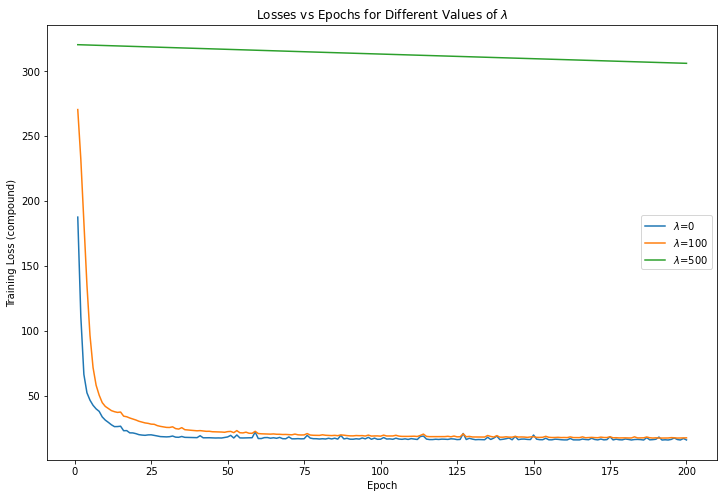

In [93]:
# Train MLPs for the given values of lambda
# Code copied from MLP Notebook
def mlp_lambda(lambda_):
    mlp = MLP(seed=2)
    mlp.add_layer(X_train2.shape[1], 20)
    mlp.add_layer(20, 20, "relu")
    mlp.add_layer(20, 2, "relu")
    mlp, losses_train, losses_test = sgd(X_train2.to_numpy(), y_train2.to_numpy(), X_test2.to_numpy(), y_test2.to_numpy(),
                                        mlp, lambda_=lambda_,learning_rate = 5e-5,
                                        n_epochs=200,
                                        minibatchsize=20)
    return mlp, losses_train, losses_test

# Code copied from MLP Notebook
fig, ax = plt.subplots(figsize=(12, 8))
lambda_values = [0, 100, 500]
for lambda_ in lambda_values:
    mlp, losses_train, losses_test = mlp_lambda(lambda_)
    ax.plot(np.arange(1,201), losses_train,label=f"$\lambda$={lambda_}")
ax.set(title=r"Losses vs Epochs for Different Values of $\lambda$", xlabel = "Epoch", ylabel = "Training Loss (compound)")
ax.legend()
plt.show()

The compound loss function penalises large differences between the predicted minimum temperature and the actual minimum temperature, and the same for the maximum temperature. The compound loss also penalises the model if $\hat{T}^{(i)}_{max}<\hat{T}^{(i)}_{min}$; this is a natural thing to penalise since it does not make sense to predict the maximum temperature to be less than the predicted minimum temperature. The value of $\lambda$ control how much we penalise this logical constraint.

When $\lambda = 0$ we observe relatively high training and testing $r^2$ values. These values are not compromised too much when we make $\lambda=100$; in essence we have made our temperature predictions make more sense (since they cannot violate the logical constraint) without sacrificing a siginificant amount of accuracy. Furthermore, both models converge in a relatively small number of epochs (after around 50 epochs both see minimal changes in loss). When $\lambda =100$ we have very slightly slower convergence, but again this tradeoff for more logical temperature predictions is desirable.

However when $\lambda = 500$ the model performs extremely poorly. The loss does not converge, remaining close to its original value after 200 epochs, and the $r^2$ values are awful. This indicates that the choice of $\lambda=500$ is too high - the loss function greatly penalises predictions when the logical constraint is violated (which is good) but these penalties begin to overshadow the penalties arising from the differences in predicted and true temperatures (both minimum and maximum). As such when attempting to minimise the loss the model is focussing too much on ensuring $\hat{T}^{(i)}_{max}<\hat{T}^{(i)}_{min}$, even though predicting $\hat{T}^{(i)}_{min}$ close to ${T}^{(i)}_{min}$ and $\hat{T}^{(i)}_{max}$ close to ${T}^{(i)}_{max}$ is extremely important, and in fact the main aim of the neural network. As such our neural network struggles to learn the actual behaviour of the minimum and maximum temperatures.

<a name="task-32"></a>

## (3.2) [(index)](#index-task-32)

In [94]:
train_mask = train['Weather and flight condition category'].isin([1, 3])
test_mask = test['Weather and flight condition category'].isin([1, 3])

# Apply the masks to create the filtered dataframes
train_filtered = train[train_mask]
test_filtered = test[test_mask]

display(train_filtered)

,Days of airfrost,Precipitation,Sunshine hours,Humidity (%),Wind Speed,Aircraft total movements,Weather and flight condition category,Runway surface minimal temperature,Runway surface maximal temperature
0,24,59.9,58.5,79.3,5.1,1347,3,-2.6,3.8
1,0,66.7,158.3,61.0,3.5,1306,1,11.5,20.0
3,0,34.0,192.8,60.2,2.6,1270,1,12.2,22.4
4,8,17.7,50.3,79.7,2.9,1319,3,2.3,9.5
5,0,55.1,56.0,66.0,4.0,1237,3,4.9,10.3
...,...,...,...,...,...,...,...,...,...
562,0,71.1,57.6,69.3,4.3,1288,3,4.4,10.2
563,5,106.9,54.7,71.4,4.8,1407,3,3.1,8.8
564,0,115.2,159.9,58.9,4.0,1403,1,13.1,21.4
565,6,26.0,115.9,63.0,3.4,1399,3,1.8,8.7


In [95]:
X_train3 = train_filtered.drop(train_filtered.columns[6:],axis=1)
X_test3 = test_filtered.drop(test_filtered.columns[6:],axis=1)

display(X_train3)

y_train3 = train_filtered[train_filtered.columns[6]]
y_test3 = test_filtered[test_filtered.columns[6]]

y_train3 = y_train3.copy().replace([3], 0)
y_test3 = y_test3.copy().replace([3], 0)

display(y_train3)

y_train3 = y_train3.astype(int)
y_test3 = y_test3.astype(int)

,Days of airfrost,Precipitation,Sunshine hours,Humidity (%),Wind Speed,Aircraft total movements
0,24,59.9,58.5,79.3,5.1,1347
1,0,66.7,158.3,61.0,3.5,1306
3,0,34.0,192.8,60.2,2.6,1270
4,8,17.7,50.3,79.7,2.9,1319
5,0,55.1,56.0,66.0,4.0,1237
...,...,...,...,...,...,...
562,0,71.1,57.6,69.3,4.3,1288
563,5,106.9,54.7,71.4,4.8,1407
564,0,115.2,159.9,58.9,4.0,1403
565,6,26.0,115.9,63.0,3.4,1399


0      0
1      1
3      1
4      0
5      0
      ..
562    0
563    0
564    1
565    0
566    1
Name: Weather and flight condition category, Length: 288, dtype: int64

In [96]:
def logistic_loss(y_true, y_pred):
    """
    Compute the probabalistic logistic loss for binary classification.
    Makes use of np.clip for numerical stability (avoids taking log of 0)

    Parameters:
        y_true: ground-truth array, with shape (K, )
        y_pred: predictions array, with shape (K, )

    Returns:
        (np.array) logistic loss
    """
    
    eps = 1e-7
    y_pred = np.clip(y_pred, eps, 1 - eps)
    
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def grad_logistic_loss(y_true, y_pred):
    """
    Compute gradient of logistic loss

    Parameters:
        y_true: ground-truth array, with shape (K, )
        y_pred: predictions array, with shape (K, )

    Returns:
        np.array: Gradient of the logistic loss
    """
    
    # Ensure y_true and y_pred have the same shape
    y_true = y_true.reshape(-1, 1)
    y_pred = y_pred.reshape(-1, 1)
    
    return y_pred - y_true

In [97]:
class TransferMLP:
    """
    This class represents a Multi-Layer Perceptron (MLP) specifically for traansfer learning.
    We make use of a pre-trained MLP from the class 'MLP', remove the regression output layer, and train a new output layer for classification.
    Existing layers are NOT retrained.
    
    This class is also shipped with methods that perform essential operations
    ON AN EXISTING MLP. As such, the only method we share with  the class'MLP' is
    predict. We no longer require any other methods since we restrict ourself to train
    only one layer with fixed output dimension 1.
    
    NOTE: Unlike the old MLP class, we now have separate attrbiutes for the last layer for classification and the
          rest of the layers (that arise from the pre-trained MLP).
          This could also have been implemented without this structure, perhaps as a child class of MLP.
    """
    
    def __init__(self, pretrained_mlp, seed=2):
        # Extract all layers except the final output layer (which would be for regression in our use case) of an existing trained MLP
        # This ensures we do not have to train these layers
        self.frozen_layers = pretrained_mlp.layers[:-1]
        self.rng = np.random.default_rng(seed)
        
        # Add a new output layer for classification using the sigmoid activation
        # Follows structure of add_layer in class MLP
        n_inputs = self.frozen_layers[-1]["W"].shape[0]  # Get output dim of last frozen layer
        self.classification_layer = {
            # only for debugging.
            "index": len(self.frozen_layers),
            # apply Glorot initialisation for weights.
            "W": self.rng.normal(size=(1, n_inputs)) * np.sqrt(2. / (n_inputs + 1)),
            # initialise bias vector with zeros (is a scalaar sicne we have only one output for classification)
            "b": np.zeros(1),
            "activation": "sigmoid"
        }

    def predict(self, X):
        """
        Forward pass through frozen layers and classification layer.
        Returns probabilities and intermediate values.
        """
        # We assume that we work with a batch of examples (ndim==2).
        if X.ndim == 1:
            # If one example passed, add a dummy dimension for the batch.
            X = X.reshape(1, -1)

        # store pre- and post-activations in list (of the frozen layers)
        forward_pass = [{"index": 0, "a": X, "h": X}]
        
        # iterate through hidden layers (but only the frozen ones)
        for k in range(1, len(self.frozen_layers)):
            a = dense(forward_pass[k - 1]["h"], self.frozen_layers[k - 1]["W"], self.frozen_layers[k - 1]["b"])
            activation = activation_table[self.frozen_layers[k]["activation"]]
            forward_pass.append({"index": k, "a" : a, "h" : activation(a)})
        
        final_a = dense(forward_pass[-1]["h"], self.classification_layer["W"], self.classification_layer["b"])
        
        # Find the probabilities using the sigmoid activation function
        probs = sigmoid_activation(final_a)
        
        # Ensure output has correct shape (batch_size, 1)
        probs = probs.reshape(-1, 1)
        
        # Add the new classification layer to the forward pass
        forward_pass.append({"index": len(self.frozen_layers), "a": final_a, "h": probs})
        
        return probs, forward_pass

In [98]:
# Function based on sgd_step from MLP Notebook
def transfer_sgd_step(X, y, mlp, learning_rate=1e-3):
    """
    Apply a stochastic gradient descent step using the sampled batch.
    Only updates the output/classification layer weights.
    Rather than returning all 
    Parameters:
        X (np.ndarray): The input features array batch, with dimension (K, p).
        y (np.ndarray): The ground-truth of the batch, with dimension (K, 1).
        mlp (MLP): The MLP object enacpsulating the MLP model.
        learning_rate (float): The learning rate multiplier for the update steps in SGD.
    Returns:
        None. Instead simply edits the classification_layer attribute of the mlp instance.
              (see TransferMLP class)
    """
    
    # Compute the forward pass.
    y_hat, forward_pass = mlp.predict(X)
    
    # Compute the partial derivative of the loss w.r.t. to predictions `y_hat`.
    # delta_output = grad_logistic_loss(y, y_hat).reshape(-1, 1)
    delta_output = grad_logistic_loss(y, y_hat)
    
    # Apply backpropagation algorithm to compute the gradients of the MLP parameters.
    # Here we only backpropograte through the output layer
    h = forward_pass[-2]["h"]
    
    # Find the gradients
    grad_W = (delta_output.T @ h) / h.shape[0]  # Shape will be (1, n_features)
    grad_b = np.mean(delta_output,axis=0)  # Shape will be (1,)
    
    # Update the classification layer only.
    mlp.classification_layer["W"] = mlp.classification_layer["W"] - learning_rate * grad_W
    mlp.classification_layer["b"] = mlp.classification_layer["b"] - learning_rate * grad_b

In [99]:
def transfer_sgd(X_train, y_train, X_test, y_test, mlp, learning_rate = 1e-3,
        n_epochs=50, minibatchsize=8, seed=2):
    """
    Run the Stochastic Gradient Descent (SGD) algorithm to optimise the parameters of MLP model to fit it on
    the training data using cross entropy loss.

    Parameters:
        X_train (np.ndarray): The training data features, with shape (N^{training}, p).
        y_train (np.ndarray): The training data ground-truth, with shape (N^{training}, 1).
        X_test (np.ndarray): The testing data features, with shape (N^{test}, p).
        y_test (np.ndarray): The testing data ground-truth, with shape (N^{test}, 1).
        mlp (MLP): The MLP object enacpsulating the MLP model.
        learning_rate (float): The learning_rate multiplier used in updating the parameters at each iteration.
        n_epochs (int): The number of training cycles that each covers the entire training examples.
        minibatchsize (int): The batch size used in each SGD step.
        seed (int): A seed for the RNG to ensure reproducibility across runtime sessions.

    Returns:
        train_losses: Train losses over epochs.
        test_losses: Test losses over epochs.
        train_accuracies: Test accuracies over epochs.
        test_accuracies: Test accuracies over epochs.
    """
    
    # get random number generator
    rng = np.random.default_rng(seed)
    
    # compute number of iterations per epoch
    n_iterations = int(len(y_train) / minibatchsize)
    
    # Ensure labels are the right shape
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    
    # store losses and accuracies
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    
    epochs_bar = tqdm(range(n_epochs))
    for i in epochs_bar:
        
        # shuffle data
        p = rng.permutation(len(y_train))
        X_train_shuffled = X_train[p]
        y_train_shuffled = y_train[p]
        
        for j in range(n_iterations):
            # get batch
            X_batch = X_train_shuffled[j*minibatchsize : (j+1)*minibatchsize]
            y_batch = y_train_shuffled[j*minibatchsize : (j+1)*minibatchsize]
            
            # apply sgd step
            transfer_sgd_step(X_batch, y_batch, mlp, learning_rate)
        
        # compute loss at the end of each epoch
        # also compute accuracy for classification
        y_hat_train, _ = mlp.predict(X_train)
        y_hat_test, _ = mlp.predict(X_test)
        train_loss = logistic_loss(y_train, y_hat_train)
        test_loss = logistic_loss(y_test, y_hat_test)
        train_acc = np.mean((y_hat_train > 0.5) == y_train)
        test_acc = np.mean((y_hat_test > 0.5) == y_test)
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
        
        epochs_bar.set_description(
            f'train_loss: {train_loss:.4f}, '
            f'test_loss: {test_loss:.4f}, '
            f'train_acc: {train_acc:.4f}, '
            f'test_acc: {test_acc:.4f}'
        )
        
    return train_losses, test_losses, train_accuracies, test_accuracies

In [100]:
# Get the pre-trained model with lambda = 0 from q3.1 (for temperature regression)
pretrained_mlp, _, _ = mlp_lambda(0)

# Create and train the transfer learning MLP (for 'Weather and flight condition' classification)
transfer_mlp = TransferMLP(pretrained_mlp)
train_losses, test_losses, train_accs, test_accs = transfer_sgd(
    X_train3.to_numpy(), y_train3.to_numpy(), 
    X_test3.to_numpy(), y_test3.to_numpy(),
    transfer_mlp,
    learning_rate=0.001,
    n_epochs=50,
    minibatchsize=8
)

train_loss: 16.00, test_loss: 17.42, train_R^2: 0.8144 test_R^2: 0.7774 : 100%|██████████| 200/200 [00:05<00:00, 35.45it/s]
train_loss: 0.1626, test_loss: 0.1399, train_acc: 0.9861, test_acc: 0.9917: 100%|██████████| 50/50 [00:00<00:00, 140.45it/s]


In [101]:
print(test_accs[-1])

0.9916666666666667


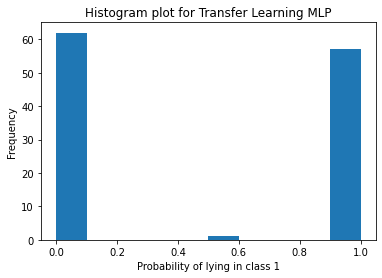

In [102]:
probs, _ = transfer_mlp.predict(X_test3.to_numpy())
plt.hist(probs)
plt.xlabel('Probability of lying in class 1')
plt.ylabel('Frequency')
plt.title('Histogram plot for Transfer Learning MLP')
plt.show()

We observe that our transfer learning approach has an extremely high testing accuracy of 0.9917. This is reflected in the histogram: the MLP is making extremely confident predictions regarding the classification task - either it predicts the probability of lying in class 1 as very close to 0 or very close to 1. This could indicate a relationship between classes 1 and 3 of weather condition and minimum and maximum temperature. We investigate this relationship in the plot below.

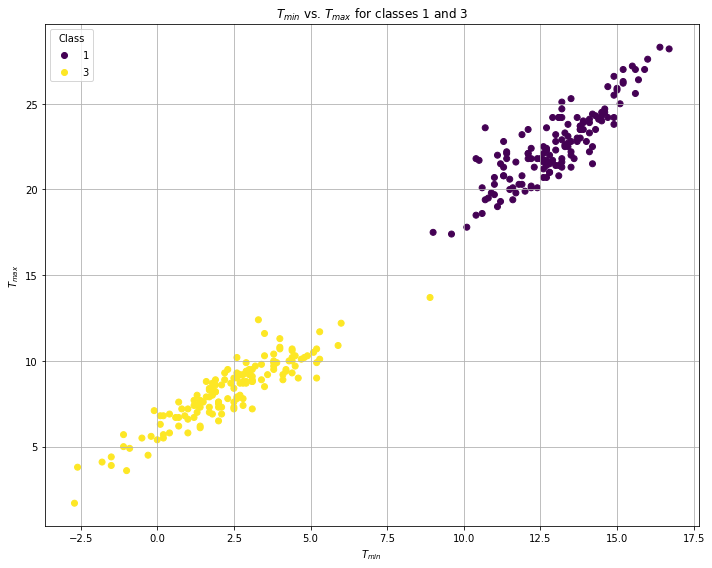

In [103]:
df1and3 = train[(train['Weather and flight condition category'] == 1) | (train['Weather and flight condition category'] == 3)]

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df1and3['Runway surface minimal temperature'], df1and3['Runway surface maximal temperature'], c=df1and3['Weather and flight condition category'],)

plt.xlabel(r'$T_{min}$')
plt.ylabel(r'$T_{max}$')
plt.title(r'$T_{min}$ vs. $T_{max}$ for classes 1 and 3')
legend_elements = scatter.legend_elements()
plt.legend(*legend_elements, title="Class")
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot above shows that a separator for temperatures also separates the weather conditon classes 1 and 3. As such the MLP used for regression on temperatures is also effective in distinguishing between the classes of weather condition. This explains our extremely high accuracy value and extremely confident predictions from the historgram.

This highlights the power of transfer learning. Despite having a small dataset, we are able to in essence, double the size of our dataset by considering other variabels which are highly correlated with our target variable.

In [104]:
# Function copied from MLP Notebook
def backpropagate(layers, forward_pass, delta_output):
    """
    Apply the backpropagation algorithm to the MLP layers to compute the gradients starting from
    the output layer to the input layer, and starting the chain rule from the
    partial derivative of the loss function w.r.t the predictions $\hat{y}$

    Parameters:
        layers (List[Dict[str, np.ndarray]]): The MLP sequence of layers, as shown in the diagrams.
        forward_pass (List[Dict[str, np.ndarray]]): The forward pass intermediate values for
            each layer, representing a computation graph.
        delta_output (np.ndarray): the partial derivative of the loss function w.r.t the
            predictions $\hat{y}$, has the shape (K, 1), where K is the batch size.
    Returns:
        gradients (List[Dict[str, np.ndarray]]): The computed gradient using a structure symmetric in the layers, as shown
            in the diagrams.

    """
    # Create a list that will contain the gradients of all the layers.
    gradients = []

    # Initialise delta.
    delta = delta_output

    assert len(layers) == len(forward_pass), "Number of layers is expected to match the number of forward pass layers"

    # Iterate on layers backwardly, from output to input.
    # Calculate gradients w.r.t. weights and biases of each level and store in list of dictionaries.
    for layer, forward_computes in reversed(list(zip(layers, forward_pass))):   # zip iterates through pairs of layers and forward_pass
        assert forward_computes["index"] == layer["index"], "Mismatch in the index."

        h = forward_computes["h"]
        assert delta.shape[0] == h.shape[0], "Mismatch in the batch dimension."

        # Gradients are average gradients over batch
        gradients.append({"W" : (delta.T @ h) / h.shape[0], # <-- SOLUTION
                          "b" : delta.mean(axis=0)}) # <-- SOLUTION

        # Update the delta for the next iteration
        grad_activation_f = grad_activation_table[layer["activation"]]
        grad_activation = grad_activation_f(forward_computes["a"])

        # Calculate the delta for the backward layer.
        delta = np.stack([np.diag(gi) @ layer["W"].T @ di
                           for (gi, di) in zip(grad_activation, delta)]) # <-- SOLUTION.


    # Return now ordered list matching the layers.
    gradients = list(reversed(gradients))
    return gradients

In [105]:
# Class copied from MLP Notebook
class MLP:
    """
    This class represents a Multi-Layer Perceptron (MLP), that we are going
    to use to encapsulate two components:
        1. layers: the sequence of layers, where each layer is stored in
            a dictionary in the format {"W": np.ndarray, "b": np.ndarray},
            where "W" points to the weights array, and "b" points to
            the bias vector.
        2. rng: a pseudo random number generator (RNG) initialised to generate
            the random weights in a reproducible manner between different
            runtime sessions.
    This class is also shipped with methods that perform essential operations
    with a MLP, including:
        - add_layers: which creates a new layer with specified dimensions.
        - predict: applies the MLP forward pass to make predictions and produces
            a computational graph for the forward pass that can be used to
            compute gradients using backpropagation algorithm.
        in addition to other light functions that return simple statistics about
        the MLP.
    """
    def __init__(self, seed=2):
        self.layers = []
        self.rng = np.random.default_rng(seed)

    def n_parameters(self):
        """Return the total number of parameters of weights and biases."""
        return sum(l["b"].size + l["W"].size for l in self.layers)

    def n_layers(self):
        """Return current number of MLP layers."""
        return len(self.layers)

    def layer_dim(self, index):
        """Retrieve the dimensions of the MLP layer at `index`."""
        return self.layers[index]["W"].shape

    def add_layer(self, in_dim, out_dim, activation="identity"):
        """Add fully connected layer to MLP.

        Parameters:
            in_dim (int): The output dimension of the layer.
            out_dim (int): The input dimension of the layer.
            activation (str): The activation function name.
        """
        # check if input-dimension matches output-dimension of previous layer
        if self.n_layers() > 0:
            last_out_dim, _ = self.layer_dim(-1)
            assert in_dim == last_out_dim, f"Input-dimension {in_dim} does not match output-dimension {last_out_dim} of previous layer."

        # the first layer, in our convention illustrated, does not apply activation on the input features X.
        if self.n_layers() == 0:
            assert activation == "identity", "Should not apply activations on the input features X, use Identity function for the first layer."


        # store each layer as a dictionary in the list, as shown in the
        # attached diagram.
        self.layers.append({
            # only for debugging.
            "index": len(self.layers),
            # apply Glorot initialisation for weights.
            # hint: use self.rng.normal()
            "W": self.rng.normal(size=(out_dim, in_dim)) * np.sqrt(2. / (in_dim + out_dim)),
            # initialise bias vector with zeros.
            "b": np.zeros(out_dim),
            # store the activation function (as string)
            "activation": activation
        })

    def predict(self, X):
        """Apply the forward pass on the input X and produce prediction and the
        forward computation graph.

        Parameters:
            X (np.ndarray): Feature matrix.

        Returns:
            (np.ndarray, List[Dict[str, np.ndarray]]): A tuple of the
            predictions and the computation graph as a sequence of intermediate
            values through the MLP, specifically each layer will have a corresponding
            intermediate values {"a": np.ndarray, "h": np.ndarray}, as shown in the
            attached diagram above.
        """
        # We assume that we work with a batch of examples (ndim==2).
        if X.ndim == 1:
            # If one example passed, add a dummy dimension for the batch.
            X = X.reshape(1, -1)

        # store pre- and post-activations in list
        forward_pass = [{"index": 0, "a": X, "h": X}]

        # iterate through hidden layers
        for k in range(1, len(self.layers)):
            # compute pre-activations
            a = dense(forward_pass[k - 1]["h"], self.layers[k - 1]["W"], self.layers[k - 1]["b"])
            activation = activation_table[self.layers[k]["activation"]]
            forward_pass.append({"index": k, "a" : a, "h" : activation(a)})

        y_hat = dense(forward_pass[-1]["h"], self.layers[-1]["W"], self.layers[-1]["b"])
        # predicted target is output of last layer
        return y_hat, forward_pass

In [106]:
# Function based on sgd from MLP Notebook
# Adapted to work with the compound loss
def sgd(X_train, y_train, X_test, y_test, mlp, learning_rate = 1e-3,
        n_epochs=50, minibatchsize=8, seed=2):
    """
    Run the Stochastic Gradient Descent (SGD) algorithm to optimise the parameters of MLP model to fit it on
    the training data using MSE loss.

    Parameters:
        X_train (np.ndarray): The training data features, with shape (N^{training}, p).
        y_train (np.ndarray): The training data ground-truth, with shape (N^{training}, 1).
        X_test (np.ndarray): The testing data features, with shape (N^{test}, p).
        y_test (np.ndarray): The testing data ground-truth, with shape (N^{test}, 1).
        mlp (MLP): The MLP object enacpsulating the MLP model.
        learning_rate (float): The learning_rate multiplier used in updating the parameters at each iteration.
        n_epochs (int): The number of training cycles that each covers the entire training examples.
        minibatchsize (int): The batch size used in each SGD step.
        seed (int): A seed for the RNG to ensure reproducibility across runtime sessions.

    Returns:
        mlp (MLP): MLP object encapuslating the trained MLP model.
        losses_train (np.ndarray): Train losses over epochs.
        losses_tset (np.ndarray): Test losses over epochs.
    """

    # get random number generator
    rng = np.random.default_rng(2)

    # compute number of iterations per epoch
    n_iterations = int(len(y_train) / minibatchsize)

    # store losses
    losses_train = []
    losses_test = []
    train_accuracies = []
    test_accuracies = []

    epochs_bar = tqdm(range(n_epochs))
    for i in epochs_bar:

        # shuffle data
        p = rng.permutation(len(y_train))
        X_train_shuffled = X_train[p]
        y_train_shuffled = y_train[p]

        for j in range(n_iterations):
            # get batch
            X_batch = X_train_shuffled[j*minibatchsize : (j+1)*minibatchsize]
            y_batch = y_train_shuffled[j*minibatchsize : (j+1)*minibatchsize]

            # apply sgd step
            updated_layers = sgd_step(X_batch, y_batch, mlp,learning_rate=learning_rate)

            # update weights and biases of MLP
            mlp.layers = updated_layers
            
            
        # Compute metrics
        y_train_pred, _ = mlp.predict(X_train)
        y_test_pred, _ = mlp.predict(X_test)
        
        train_loss = logistic_loss(y_train, y_train_pred)
        test_loss = logistic_loss(y_test, y_test_pred)
        
        train_acc = np.mean((y_train_pred > 0.5) == y_train)
        test_acc = np.mean((y_test_pred > 0.5) == y_test)
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
        
        y_hat_train, _ = mlp.predict(X_train)
        losses_train.append(logistic_loss(y_train, y_hat_train).squeeze())
        y_hat_test, _ = mlp.predict(X_test)
        losses_test.append(logistic_loss(y_test, y_hat_test).squeeze())
        
        epochs_bar.set_description(
            f'train_loss: {train_loss:.4f}, '
            f'test_loss: {test_loss:.4f}, '
            f'train_acc: {train_acc:.4f}, '
            f'test_acc: {test_acc:.4f}'  ) 
            
    return mlp, losses_train, losses_test

In [107]:
# Function based on sgd_step from MLP Notebook
# Adapted to work with the compound loss
def sgd_step(X, y, mlp, learning_rate = 1e-3):
    """
    Apply a stochastic gradient descent step using the sampled batch.
    Parameters:
        X (np.ndarray): The input features array batch, with dimension (K, p).
        y (np.ndarray): The ground-truth of the batch, with dimension (K, 1).
        mlp (MLP): The MLP object enacpsulating the MLP model.
        lambda_ (float): Compound loss hyperparameter.
        learning_rate (float): The learning rate multiplier for the update steps in SGD.
    Returns:
        updated_layers (List[Dict[str, np.ndarray]]): The updated layers after applying SGD.
    """
    # Compute the forward pass.
    y_hat, forward_pass = mlp.predict(X)

    # Compute the partial derivative of the loss w.r.t. to predictions `y_hat`.
    delta_output = grad_logistic_loss(y, y_hat)

    # Apply backpropagation algorithm to compute the gradients of the MLP parameters.
    gradients = backpropagate(mlp.layers, forward_pass, delta_output)

    # mlp.layers and gradients are symmetric, as shown in the figure.
    updated_layers = []
    for layer, grad in zip(mlp.layers, gradients):
        W = layer["W"] - learning_rate * grad["W"]
        b = layer["b"] - learning_rate * grad["b"]
        updated_layers.append({"W": W, "b": b,
                               # keep the activation function.
                               "activation": layer["activation"],
                               # We use the index for asserts and debugging purposes only.
                               "index": layer["index"]})
    return updated_layers

train_loss: 0.7759, test_loss: 0.7767, train_acc: 0.5001, test_acc: 0.5003: 100%|██████████| 50/50 [00:01<00:00, 39.93it/s]


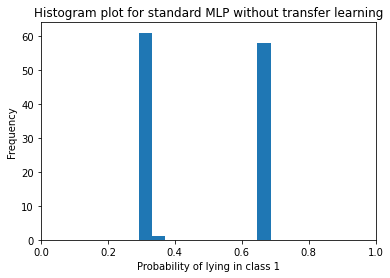

In [108]:
mlp = MLP(seed=2)
mlp.add_layer(X_train3.shape[1], 20)
mlp.add_layer(20, 20, "relu")
mlp.add_layer(20, 1, "sigmoid")
mlp, losses_train, losses_test = sgd(X_train3.to_numpy(), y_train3.to_numpy(), X_test3.to_numpy(), y_test3.to_numpy(),
                                    mlp,learning_rate = 0.001,
                                    n_epochs=50,
                                    minibatchsize=8)

probs, _ = mlp.predict(X_test3.to_numpy())
plt.hist(probs)
plt.xlabel('Probability of lying in class 1')
plt.ylabel('Frequency')
plt.title('Histogram plot for standard MLP without transfer learning')
plt.xlim(0,1)
plt.show()

Here we observe that the testing accuracy is only around 0.5 using the standard MLP architecture, which indicates that our neural network is effectively as accurate as randomly guessing the class. Again this is reflected in the histogram - the range of values has shifted from close to $[0,1]$ to being closer to $[0.3,0.7]$. This indicates that our neural network is less confident in its predictions than before.

This poor performance indicates that we perhaps might not have enough data for the MLP to distinguish between the classes effectively, since it does not have enough training data to learn the true relationships. In contrast the transfer learning model has a larger dataset since it considers temperatures in addition, solving this issue.